<a href="https://colab.research.google.com/github/ivansudibyo14/initial_findings_quickcommerce/blob/main/labs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

# Show descriptive statistics 
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sns                 #to perform visualization with many color palettes, beatifull style and many statistical plots


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1nSlK3BMq3bwWaGdnMuuqba29zrR5I7FK-q_yfVejaBk/edit#gid=1418180202'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df1 = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df1.head() #only show first of 5 rows (not based on shorting etc)

,transactions_id,status,sessions_id,payment_method_id,total_amount,transactions_timestamps
0,28750,canceled,144311,1,288000,2022-03-27 15:15:17.000000 UTC
1,1,completed,7,4,266000,2019-12-01 08:41:56.000000 UTC
2,2,completed,8,2,276000,2019-12-01 08:57:42.000000 UTC
3,3,completed,18,2,111000,2019-12-02 02:47:54.000000 UTC
4,32395,canceled,165764,1,224000,2022-07-23 13:38:46.000000 UTC


In [ ]:
# Convert the transactions_stamps column to a datetime object
df1['transactions_timestamps'] = pd.to_datetime(df1['transactions_timestamps'])

# Extract the date component from the transactions_stamps column
df1['date'] = df1['transactions_timestamps'].dt.date

# Show the first 5 rows of the data
print(df1.head())

   transactions_id     status  sessions_id  payment_method_id  total_amount  \
0            28750   canceled       144311                  1        288000   
1                1  completed            7                  4        266000   
2                2  completed            8                  2        276000   
3                3  completed           18                  2        111000   
4            32395   canceled       165764                  1        224000   

    transactions_timestamps        date  
0 2022-03-27 15:15:17+00:00  2022-03-27  
1 2019-12-01 08:41:56+00:00  2019-12-01  
2 2019-12-01 08:57:42+00:00  2019-12-01  
3 2019-12-02 02:47:54+00:00  2019-12-02  
4 2022-07-23 13:38:46+00:00  2022-07-23  


In [ ]:
# Filter the data to show only rows where the status is "completed"
completed_transactions = df1[df1['status'] == 'completed']

# Show the filtered data
print(completed_transactions)

       transactions_id     status  sessions_id  payment_method_id  \
1                    1  completed            7                  4   
2                    2  completed            8                  2   
3                    3  completed           18                  2   
8                    4  completed           31                  3   
9                    5  completed           34                  5   
...                ...        ...          ...                ...   
37736            37735  completed       214049                  4   
37737            37736  completed       214047                  3   
37738            37737  completed       214062                  2   
37739            37738  completed       214073                  3   
37740            37741  completed       214114                  2   

       total_amount   transactions_timestamps        date  
1            266000 2019-12-01 08:41:56+00:00  2019-12-01  
2            276000 2019-12-01 08:57:42+00:00  2019

In [ ]:
# Filter the data to show only rows where the status is "canceled"
canceled_transactions = df1[df1['status'] == 'canceled']

# Show the filtered data
print(canceled_transactions)


       transactions_id    status  sessions_id  payment_method_id  \
0                28750  canceled       144311                  1   
4                32395  canceled       165764                  1   
5                27039  canceled       136624                  1   
6                25926  canceled       131618                  1   
7                27032  canceled       136594                  1   
...                ...       ...          ...                ...   
37697            10632  canceled        48861                  5   
37730              298  canceled         1687                  5   
37731            25335  canceled       129078                  5   
37732            24492  canceled       125243                  5   
37733             8141  canceled        39433                  5   

       total_amount   transactions_timestamps        date  
0            288000 2022-03-27 15:15:17+00:00  2022-03-27  
4            224000 2022-07-23 13:38:46+00:00  2022-07-23  
5  

<ipython-input-8-42c776985de3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_transactions['transactions_timestamps'] = pd.to_datetime(completed_transactions['transactions_timestamps'])
<ipython-input-8-42c776985de3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_transactions['date'] = completed_transactions['transactions_timestamps'].dt.date


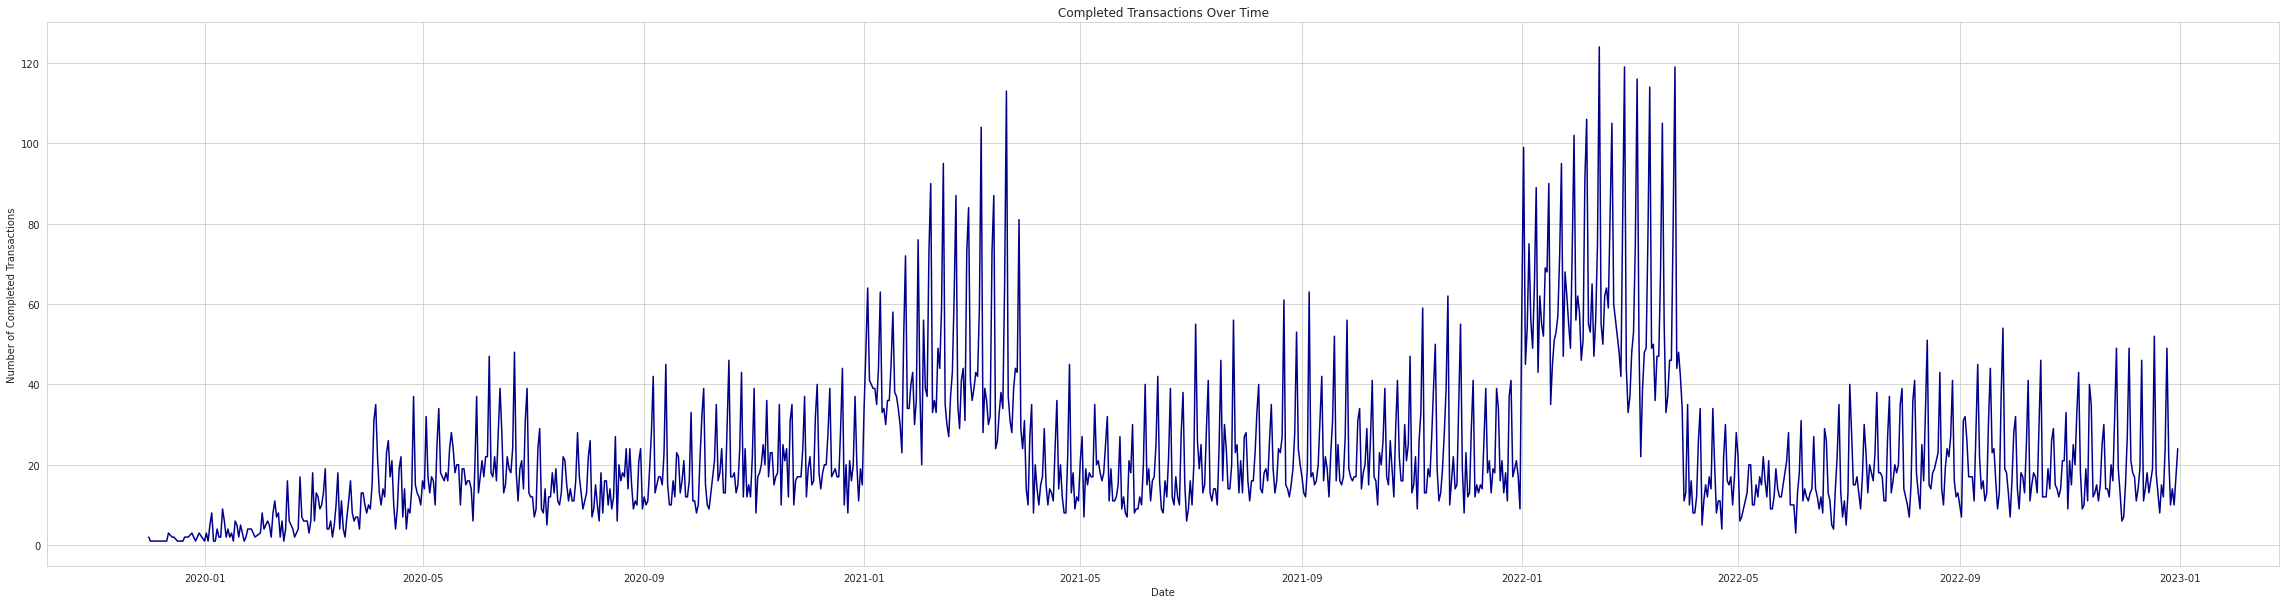

In [ ]:
# Convert the transactions_timestamps column to a datetime object
completed_transactions['transactions_timestamps'] = pd.to_datetime(completed_transactions['transactions_timestamps'])

# Extract the date component from the transactions_timestamps column
completed_transactions['date'] = completed_transactions['transactions_timestamps'].dt.date

# Count the number of completed transactions for each date
completed_counts = completed_transactions.groupby('date').size().reset_index(name='counts')

# Set the plotting style to seaborn
sns.set_style("whitegrid")

# Plot the counts of completed transactions with a dark blue line color
plt.figure(figsize=(40,10))
sns.lineplot(x="date", y="counts", data=completed_counts, color='darkblue')

# Add labels and title to the graph
plt.xlabel('Date')
plt.ylabel('Number of Completed Transactions')
plt.title('Completed Transactions Over Time')

# Show the graph
plt.show()


<ipython-input-9-a66cc523f107>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_transactions['transactions_timestamps'] = pd.to_datetime(completed_transactions['transactions_timestamps'])
/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
<ipython-input-9-a66cc523f107>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_transactions['date'] = completed_tran

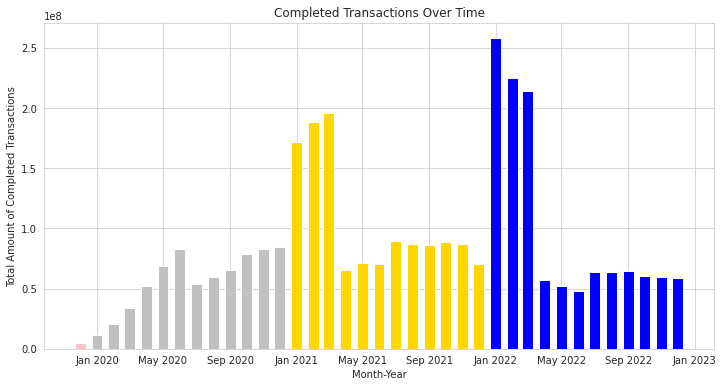

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter the data to show only rows where the status is "completed"
completed_transactions = df1[df1['status'] == 'completed']

# Convert the transactions_timestamps column to a datetime object
completed_transactions['transactions_timestamps'] = pd.to_datetime(completed_transactions['transactions_timestamps'])

# Extract the date component from the transactions_timestamps column
completed_transactions['date'] = completed_transactions['transactions_timestamps'].dt.to_period('M')

# Calculate the total amount of completed transactions for each month
completed_amounts = completed_transactions.groupby('date')['total_amount'].sum().reset_index(name='amounts')

# Convert the date column to numerical values
completed_amounts['date'] = completed_amounts['date'].dt.to_timestamp()

# Create a list of colors for each year in the data
colors = ['pink', 'silver', 'gold', 'blue', 'brown']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart of the completed transaction amounts, with a different color for each year
for i, (year, group) in enumerate(completed_amounts.groupby(completed_amounts['date'].dt.year)):
    plt.bar(group['date'], group['amounts'], width=20, color=colors[i%len(colors)])

# Set the x-axis label to show the month and year only
plt.xlabel('Month-Year')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the y-axis label
plt.ylabel('Total Amount of Completed Transactions')

# Set the title
plt.title('Completed Transactions Over Time')

# Show the plot
plt.show()


<ipython-input-10-e1610bcca42e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['transactions_timestamps'] = pd.to_datetime(canceled_transactions['transactions_timestamps'])
/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
<ipython-input-10-e1610bcca42e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['date'] = canceled_transa

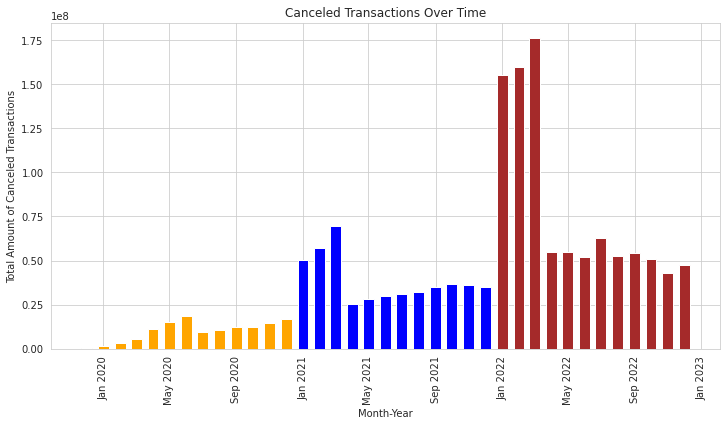

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter the data to show only rows where the status is "canceled"
canceled_transactions = df1[df1['status'] == 'canceled']

# Convert the transactions_timestamps column to a datetime object
canceled_transactions['transactions_timestamps'] = pd.to_datetime(canceled_transactions['transactions_timestamps'])

# Extract the date component from the transactions_timestamps column
canceled_transactions['date'] = canceled_transactions['transactions_timestamps'].dt.to_period('M')

# Calculate the total amount of canceled transactions for each month
canceled_amounts = canceled_transactions.groupby('date')['total_amount'].sum().reset_index(name='amounts')

# Convert the date column to numerical values
canceled_amounts['date'] = canceled_amounts['date'].dt.to_timestamp()

# Create a list of colors for each year in the data
colors = ['grey', 'orange', 'blue', 'brown', 'purple']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart of the canceled transaction amounts, with a different color for each year
for i, (year, group) in enumerate(canceled_amounts.groupby(canceled_amounts['date'].dt.year)):
    plt.bar(group['date'], group['amounts'], width=20, color=colors[i%len(colors)])

# Set the x-axis label to show the month and year only
plt.xlabel('Month-Year')
plt.xticks(rotation=90, ha='center')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the y-axis label
plt.ylabel('Total Amount of Canceled Transactions')

# Set the title
plt.title('Canceled Transactions Over Time')

# Show the plot
plt.show()


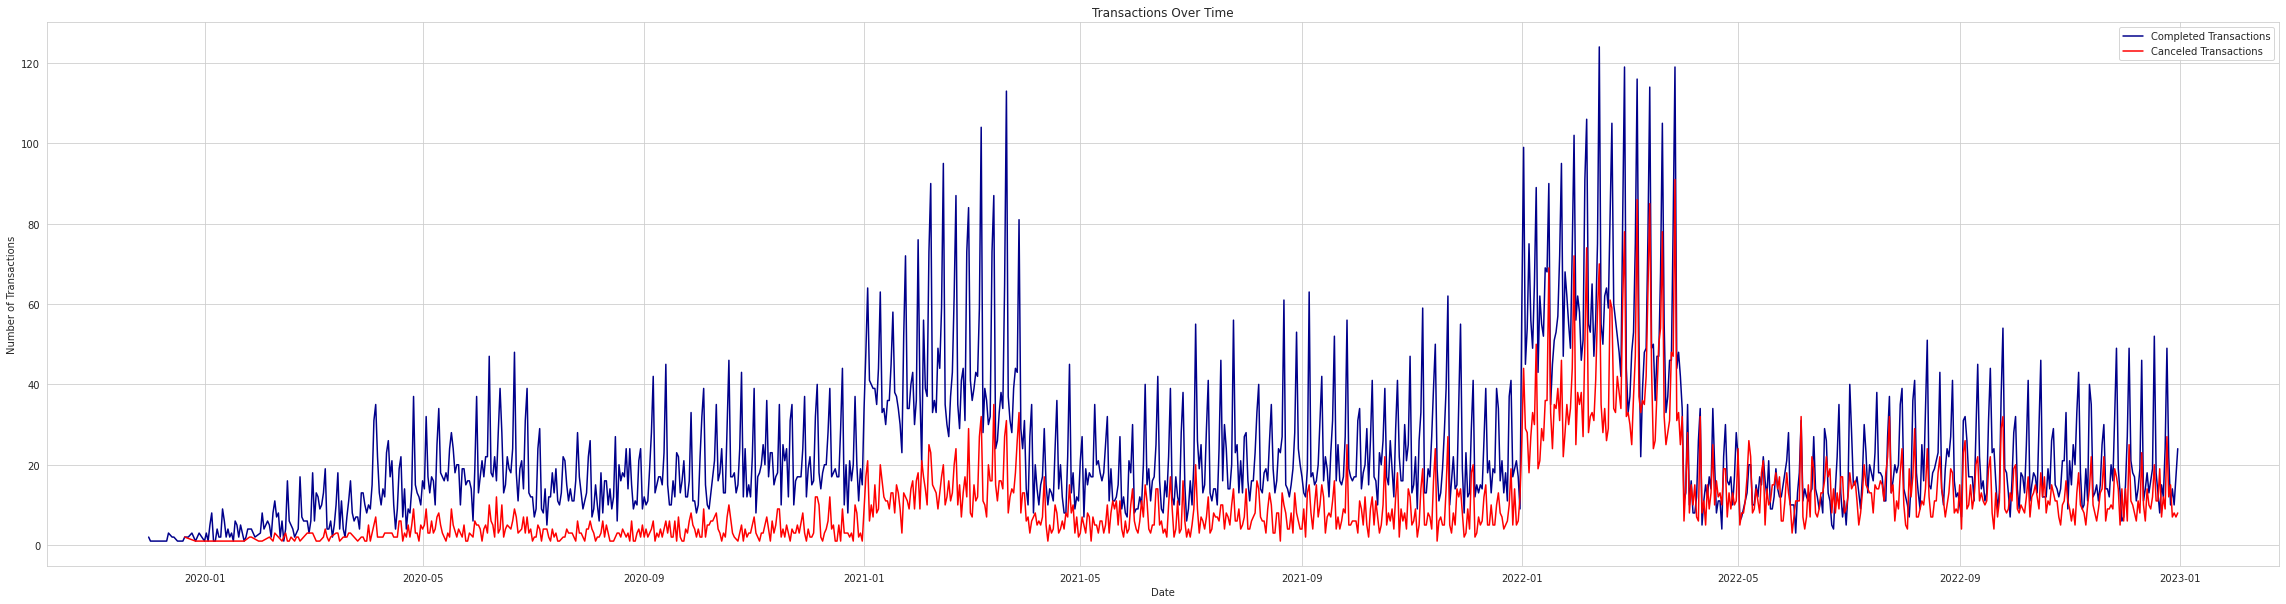

In [ ]:
# Convert the transactions_timestamps column to a datetime object
df1['transactions_timestamps'] = pd.to_datetime(df1['transactions_timestamps'])

# Extract the date component from the transactions_timestamps column
df1['date'] = df1['transactions_timestamps'].dt.date

# Filter the data to get only completed transactions
completed_transactions = df1[df1['status'] == 'completed']

# Count the number of completed transactions for each date
completed_counts = completed_transactions.groupby('date').size().reset_index(name='counts')

# Filter the data to get only canceled transactions
canceled_transactions = df1[df1['status'] == 'canceled']

# Count the number of canceled transactions for each date
canceled_counts = canceled_transactions.groupby('date').size().reset_index(name='counts')

# Set the plotting style to seaborn
sns.set_style("whitegrid")

# Plot the counts of completed transactions with a dark blue line color
plt.figure(figsize=(40,10))
sns.lineplot(x="date", y="counts", data=completed_counts, color='darkblue', label='Completed Transactions')
sns.lineplot(x="date", y="counts", data=canceled_counts, color='red', label='Canceled Transactions')

# Add labels and title to the graph
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions Over Time')
plt.legend()

# Show the graph
plt.show()

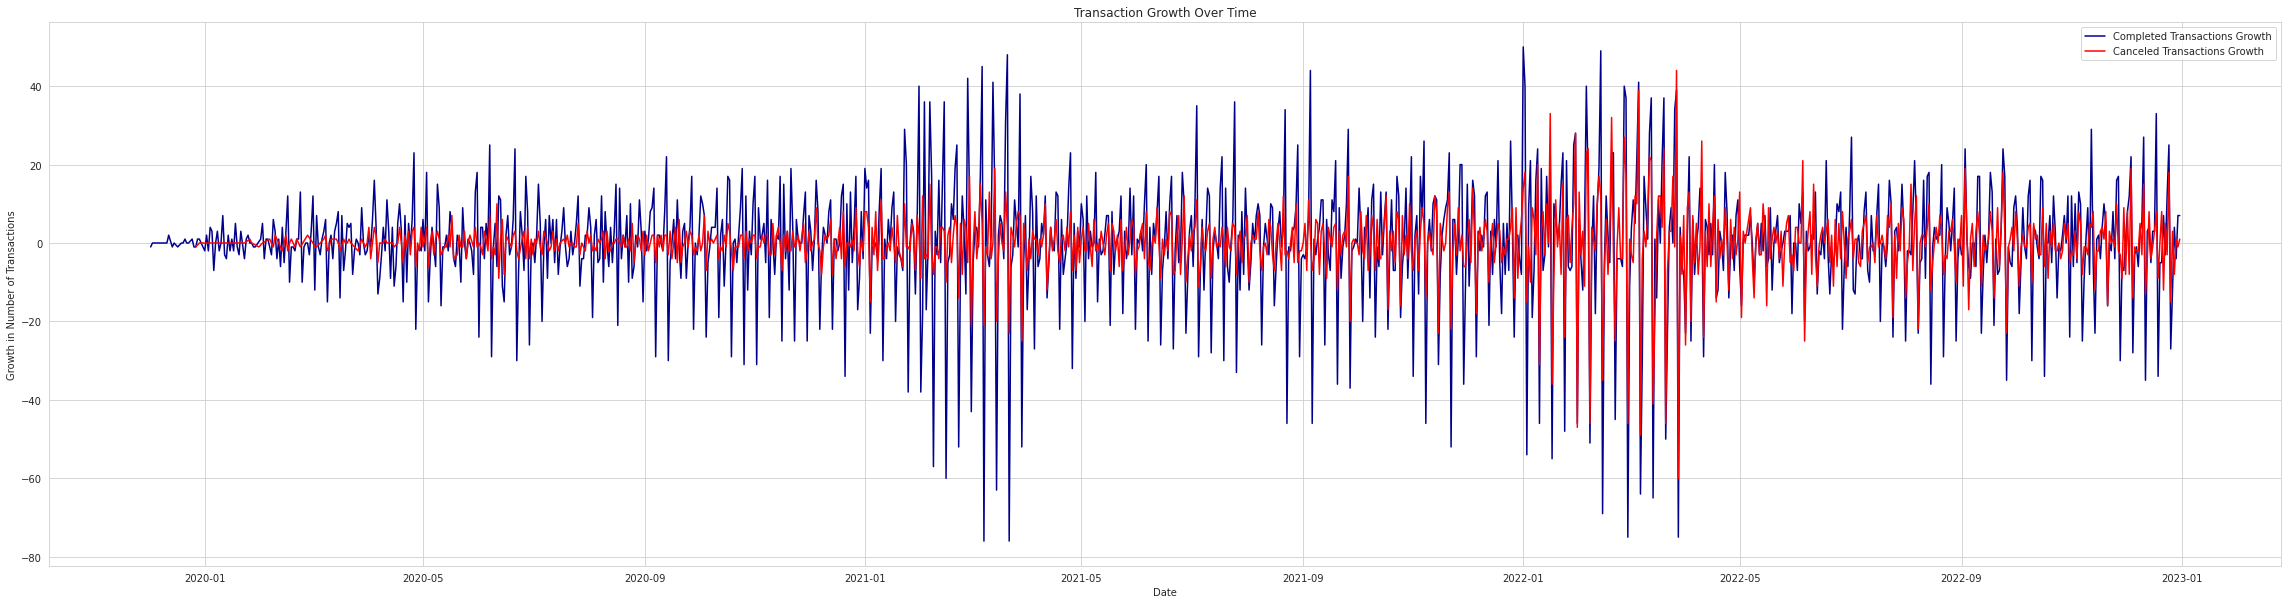

In [ ]:
# Convert the transactions_timestamps column to a datetime object
df1['transactions_timestamps'] = pd.to_datetime(df1['transactions_timestamps'])

# Extract the date component from the transactions_timestamps column
df1['date'] = df1['transactions_timestamps'].dt.date

# Filter the data to get only completed transactions
completed_transactions = df1[df1['status'] == 'completed']

# Count the number of completed transactions for each date
completed_counts = completed_transactions.groupby('date').size().reset_index(name='counts')

# Add a column to the completed_counts dataframe to show the growth in transactions compared to the previous date
completed_counts['growth'] = completed_counts['counts'] - completed_counts['counts'].shift(1)

# Filter the data to get only canceled transactions
canceled_transactions = df1[df1['status'] == 'canceled']

# Count the number of canceled transactions for each date
canceled_counts = canceled_transactions.groupby('date').size().reset_index(name='counts')

# Add a column to the canceled_counts dataframe to show the growth in transactions compared to the previous date
canceled_counts['growth'] = canceled_counts['counts'] - canceled_counts['counts'].shift(1)

# Set the plotting style to seaborn
sns.set_style("whitegrid")

# Plot the growth in completed transactions with a dark blue line color
plt.figure(figsize=(40,10))
sns.lineplot(x="date", y="growth", data=completed_counts, color='darkblue', label='Completed Transactions Growth')
sns.lineplot(x="date", y="growth", data=canceled_counts, color='red', label='Canceled Transactions Growth')

# Add labels and title to the graph
plt.xlabel('Date')
plt.ylabel('Growth in Number of Transactions')
plt.title('Transaction Growth Over Time')
plt.legend()

# Show the graph
plt.show()



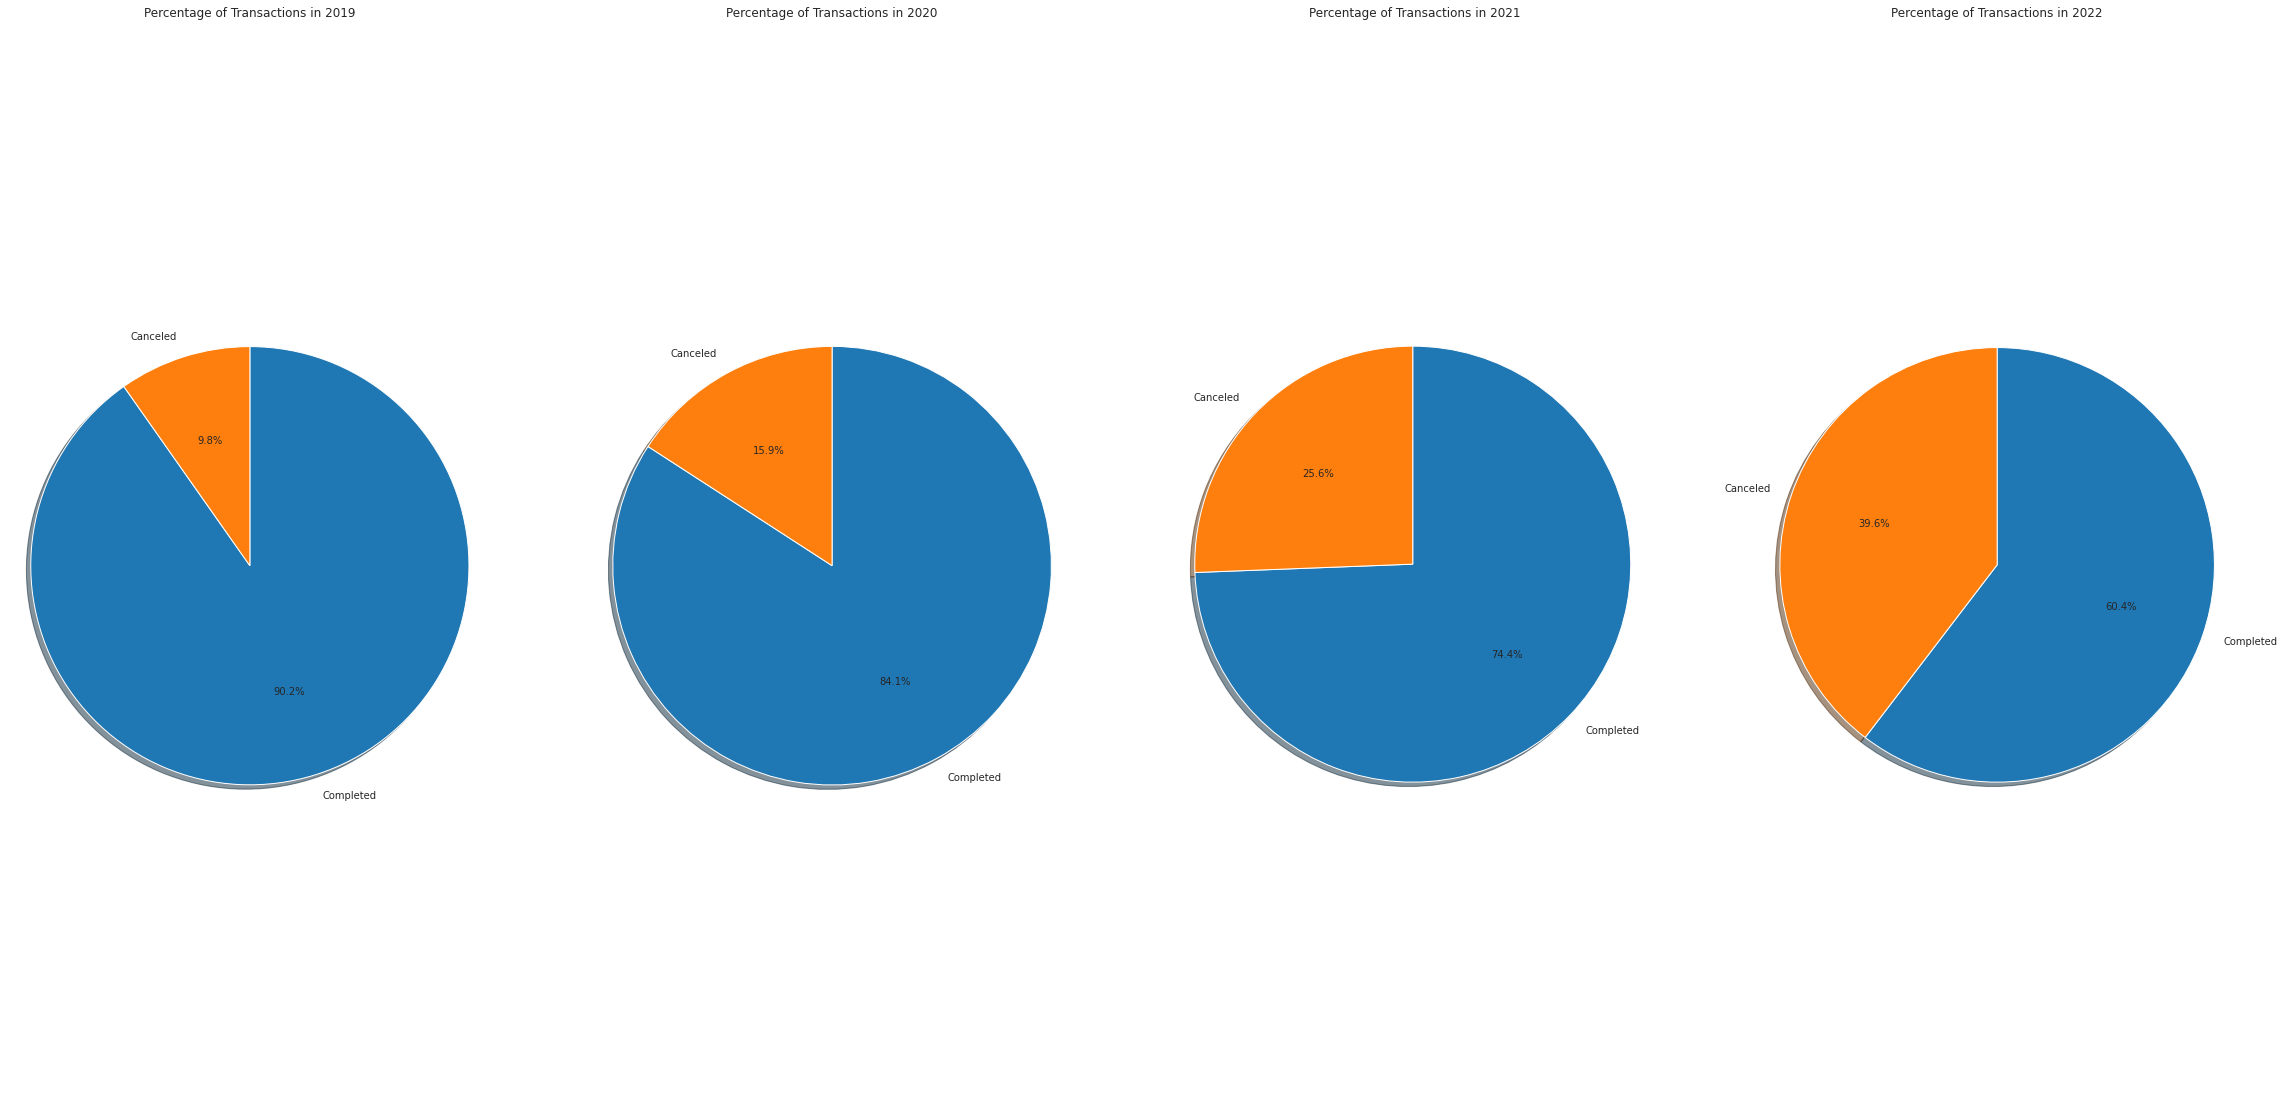

In [ ]:
# Convert the date column to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Group the data by year
grouped = df1.groupby(df1['date'].dt.year)

# Get unique years
years = grouped.groups.keys()

# Create the pie chart for each year
fig, axs = plt.subplots(1, len(years), figsize=(40,20))
for ax, year in zip(axs, years):
    group = grouped.get_group(year)
    # Count the number of completed and canceled transactions for each year
    completed_count = group[group['status'] == 'completed'].shape[0]
    canceled_count = group[group['status'] == 'canceled'].shape[0]

    # Calculate the percentage of each status for each year
    completed_percent = completed_count / (completed_count + canceled_count) * 100
    canceled_percent = canceled_count / (completed_count + canceled_count) * 100

    # Plot the pie chart for each year
    labels = ['Completed', 'Canceled']
    sizes = [completed_percent, canceled_percent]

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)
    ax.axis('equal')
    ax.set_title("Percentage of Transactions in {}".format(year))

# Show the plot
plt.show()





In [ ]:
sheet_url1 = 'https://docs.google.com/spreadsheets/d/1lIX2e46Dvjuvl_76HEDAucIi3d6DzkfhSS547IylUiQ/edit#gid=341208841'
sheet_url_trf1 = sheet_url1.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df3 = pd.read_csv(sheet_url_trf1) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df3.head() #only show first of 5 rows (not based on shorting etc)


,month,year,order_count,AOV
0,1,2020,93,423553.76
1,1,2021,1297,495087.90
2,1,2022,1951,477063.81
3,2,2020,171,392213.45
4,2,2021,1362,527621.51


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1WqHQ88Q5WlUlYbffgfrTm3IwrQXPpwHG7HAFpz4JeE0/edit#gid=1278071019'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
users = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
users.head() #only show first of 5 rows (not based on shorting etc)

,year,month,sum_user_id
0,2020,1,156
1,2021,4,391
2,2021,7,370
3,2021,12,320
4,2020,11,354


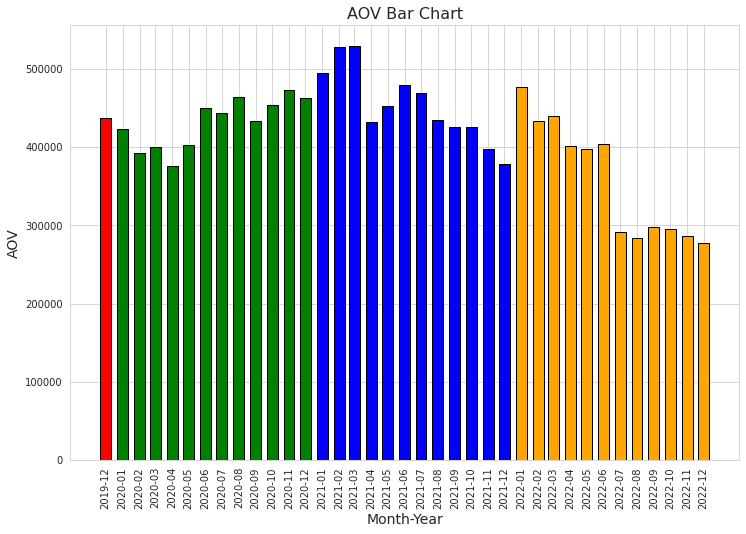

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the year and month into a datetime format
df3['date'] = pd.to_datetime(df3[['year', 'month']].assign(Day=1))

# Set the figure size to be larger and wider
plt.figure(figsize=(12, 8))

# Create a list of colors based on the year column
colors = []
for year in df3['year']:
    if year == 2019:
        colors.append('red')
    elif year == 2020:
        colors.append('green')
    elif year == 2021:
        colors.append('blue')
    elif year == 2022:
        colors.append('orange')
    elif year == 2023:
        colors.append('purple')

# Create a bar chart with date on the x-axis and colors based on the year column
plt.bar(df3['date'], df3['AOV'], width=20, color=colors, edgecolor='black')

# Format the x-axis ticks to show only the year and month
plt.xticks(df3['date'], [d.strftime('%Y-%m') for d in df3['date']], rotation=90)

# Add labels and title
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('AOV', fontsize=14)
plt.title('AOV Bar Chart', fontsize=16)

plt.show()


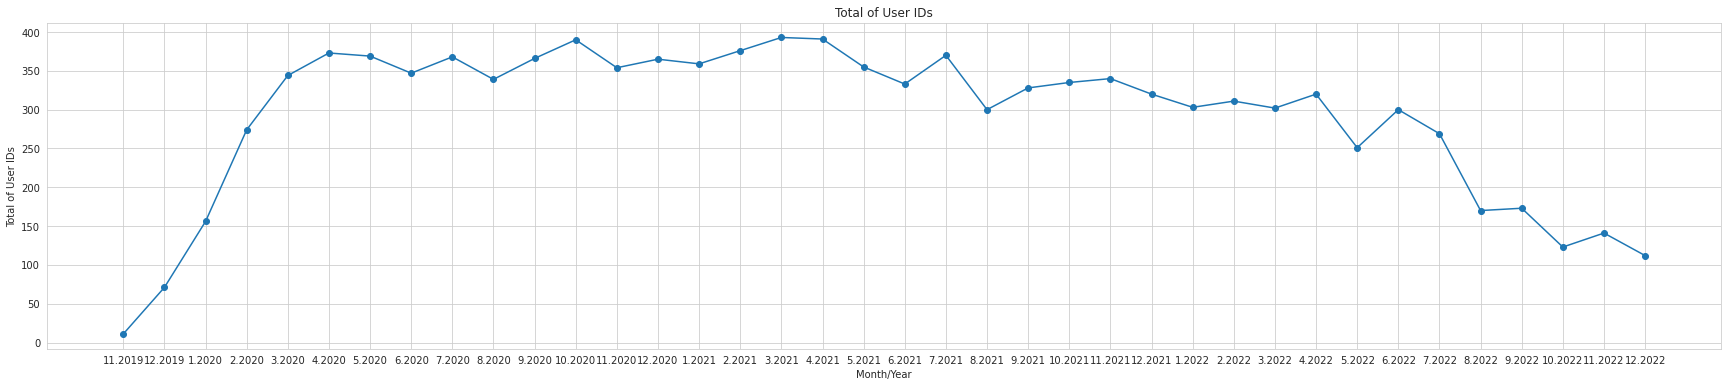

In [ ]:
# Sort the data by year and month
users = users.sort_values(by=['year', 'month'])

# Extract the data into lists
months = users['month'].values
years = users['year'].values
sum_user_ids = users['sum_user_id'].values

# Create the x-axis labels as a combination of months and years
x_labels = [f"{month}.{year}" for month, year in zip(months, years)]

# Create the figure with a width of 10 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(30, 6))

# Plot the data as dots
ax.plot(x_labels, sum_user_ids, 'o-')

# Label the x and y axes
ax.set_xlabel('Month/Year')
ax.set_ylabel('Total of User IDs')

# Add a title to the plot
ax.set_title("Total of User IDs")

# Show the plot
plt.show()


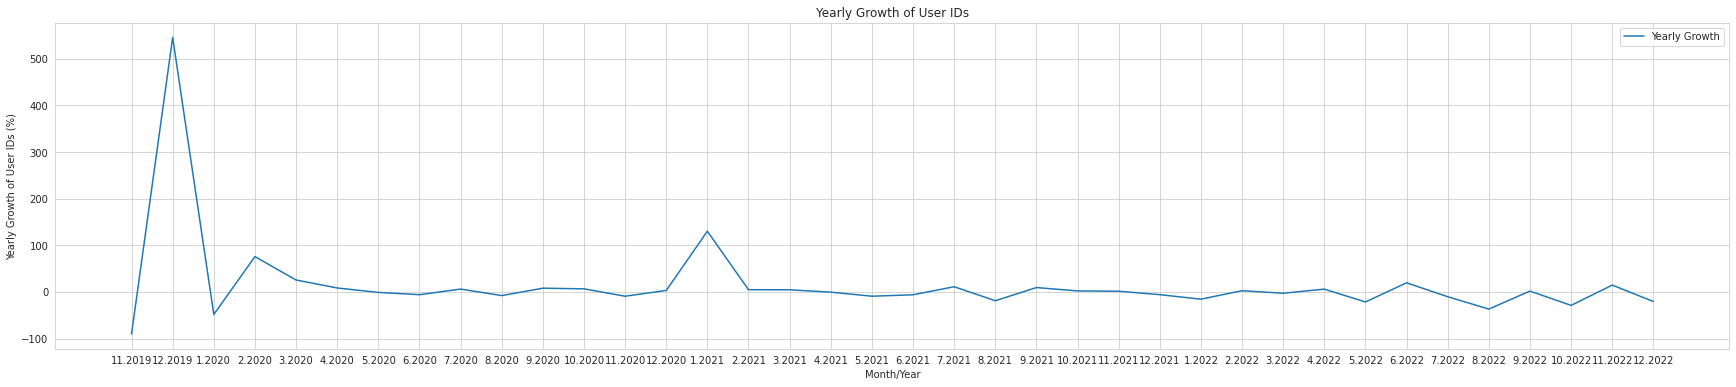

In [ ]:
# Sort the data by year and month
users = users.sort_values(by=['year', 'month'])

# Extract the data into lists
months = users['month'].values
years = users['year'].values
sum_user_ids = users['sum_user_id'].values

# Create the x-axis labels as a combination of months and years
x_labels = [f"{month}.{year}" for month, year in zip(months, years)]

# Create the figure with a width of 10 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(30, 6))

# Calculate the yearly growth in % for each month
yearly_growth = []
for i, (month, year) in enumerate(zip(months, years)):
    if month == 1:
        if i == 0:
            # First month of the first year, growth is undefined
            yearly_growth.append(None)
        else:
            # First month of the year, calculate growth compared to same month in previous year
            last_year_sum_user_ids = sum_user_ids[i-12]
            monthly_growth = (sum_user_ids[i] - last_year_sum_user_ids) / last_year_sum_user_ids * 100
            yearly_growth.append(monthly_growth)
    else:
        # Not the first month of the year, calculate growth compared to same month in previous year
        last_year_sum_user_ids = sum_user_ids[i-1]
        yearly_growth.append((sum_user_ids[i] - last_year_sum_user_ids) / last_year_sum_user_ids * 100)

# Plot the yearly growth as a single line chart
ax.plot(x_labels, yearly_growth, label='Yearly Growth')

# Label the x and y axes
ax.set_xlabel('Month/Year')
ax.set_ylabel('Yearly Growth of User IDs (%)')
ax.set_title("Yearly Growth of User IDs")
ax.legend()

# Show the plot
plt.show()


In [ ]:
traffic1_url = 'https://docs.google.com/spreadsheets/d/18wApPyif1KzqQqIgt3iJ255QwhV0IBMMYXPwJpi577A/edit#gid=364753590'
traffic1_url = traffic1_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
traffic1 = pd.read_csv(traffic1_url) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
traffic1.head() #only show first of 5 rows (not based on shorting etc)


,visits_month_year,traffic_medium,traffic_source,completed_count,canceled_count,other_count
0,2019-12,CPC,Facebook,4,0,20
1,2019-12,Email,Newsletter,7,1,19
2,2019-12,Direct,Direct,9,2,26
3,2019-12,other,other,6,0,39
4,2019-12,Organic Social,Facebook,3,0,14


<ipython-input-20-280fbf67e726>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(plt.FixedFormatter(traffic1['visits_month_year'].dt.strftime('%Y-%m')))


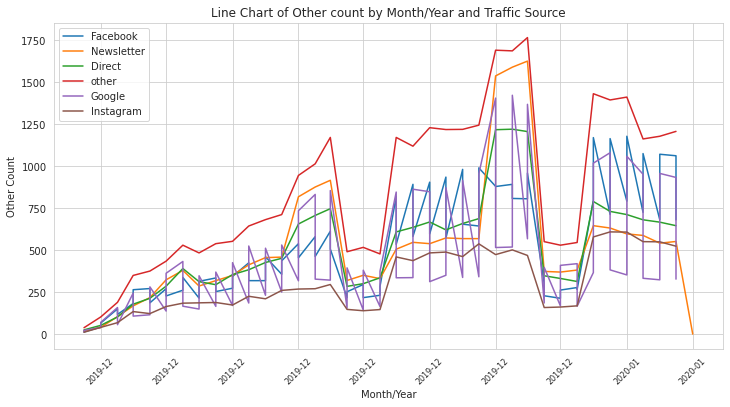

In [ ]:
import matplotlib.pyplot as plt
traffic1 = traffic1.reset_index()
# Convert the 'visits_month_year' column to a datetime object
traffic1['visits_month_year'] = pd.to_datetime(traffic1['visits_month_year'])

# Get unique values of 'traffic_source' column
traffic_sources = traffic1['traffic_source'].unique()

# Create a wider figure
fig, ax = plt.subplots(figsize=(12,6))

# Create a line plot for each traffic source
for source in traffic_sources:
    y_values = traffic1.loc[traffic1['traffic_source'] == source, 'other_count']
    x_values = traffic1.loc[traffic1['traffic_source'] == source, 'visits_month_year']
    ax.plot(x_values, y_values, label=source)

# Format the x-tick labels to show month/year format
ax.xaxis.set_major_formatter(plt.FixedFormatter(traffic1['visits_month_year'].dt.strftime('%Y-%m')))
ax.tick_params(axis='x', rotation=45, labelsize=8)

# Set labels for the x-axis, y-axis, and title
ax.set_xlabel('Month/Year')
ax.set_ylabel('Other Count')
ax.set_title('Line Chart of Other count by Month/Year and Traffic Source')

# Show legend
ax.legend()

# Show the plot
plt.show()


<ipython-input-21-41b2f3141656>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(plt.FixedFormatter(traffic1['visits_month_year'].dt.strftime('%Y-%m')))


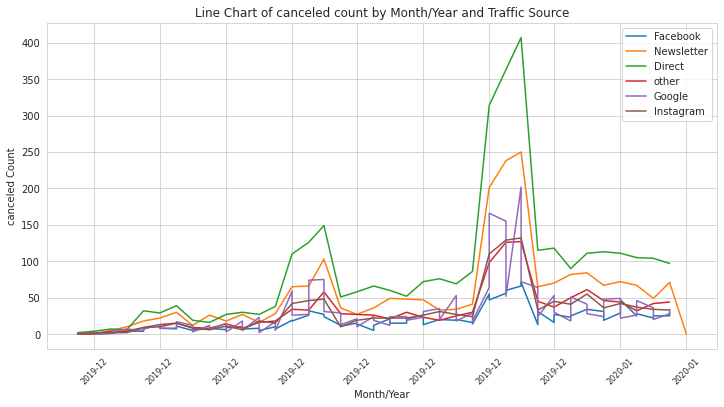

In [ ]:
import matplotlib.pyplot as plt
traffic1 = traffic1.reset_index()
# Convert the 'visits_month_year' column to a datetime object
traffic1['visits_month_year'] = pd.to_datetime(traffic1['visits_month_year'])

# Get unique values of 'traffic_source' column
traffic_sources = traffic1['traffic_source'].unique()

# Create a wider figure
fig, ax = plt.subplots(figsize=(12,6))

# Create a line plot for each traffic source
for source in traffic_sources:
    y_values = traffic1.loc[traffic1['traffic_source'] == source, 'canceled_count']
    x_values = traffic1.loc[traffic1['traffic_source'] == source, 'visits_month_year']
    ax.plot(x_values, y_values, label=source)

# Format the x-tick labels to show month/year format
ax.xaxis.set_major_formatter(plt.FixedFormatter(traffic1['visits_month_year'].dt.strftime('%Y-%m')))
ax.tick_params(axis='x', rotation=45, labelsize=8)

# Set labels for the x-axis, y-axis, and title
ax.set_xlabel('Month/Year')
ax.set_ylabel('canceled Count')
ax.set_title('Line Chart of canceled count by Month/Year and Traffic Source')

# Show legend
ax.legend()

# Show the plot
plt.show()


<ipython-input-22-fd4503d8a914>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(plt.FixedFormatter(traffic1['visits_month_year'].dt.strftime('%Y-%m')))


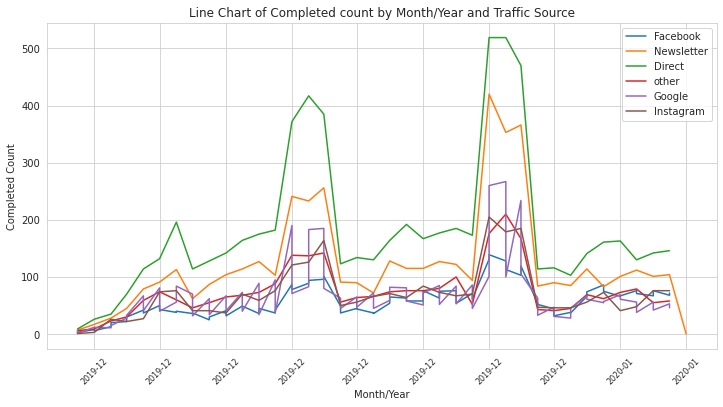

In [ ]:
import matplotlib.pyplot as plt
traffic1 = traffic1.drop('level_0', axis=1).reset_index()

# Convert the 'date' column to a datetime object
traffic1['visits_month_year'] = pd.to_datetime(traffic1['visits_month_year'])

# Get unique values of 'traffic_source' column
traffic_sources = traffic1['traffic_source'].unique()

# Create a wider figure
fig, ax = plt.subplots(figsize=(12,6))

# Create a line plot for each traffic source
for source in traffic_sources:
    y_values = traffic1.loc[traffic1['traffic_source'] == source, 'completed_count']
    x_values = traffic1.loc[traffic1['traffic_source'] == source, 'visits_month_year']
    ax.plot(x_values, y_values, label=source)

# Format the x-tick labels to show month/year format
ax.xaxis.set_major_formatter(plt.FixedFormatter(traffic1['visits_month_year'].dt.strftime('%Y-%m')))
ax.tick_params(axis='x', rotation=45, labelsize=8)

# Set labels for the x-axis, y-axis, and title
ax.set_xlabel('Month/Year')
ax.set_ylabel('Completed Count')
ax.set_title('Line Chart of Completed count by Month/Year and Traffic Source')

# Show legend
ax.legend()

# Show the plot
plt.show()




#K-MEANS Clustering

In [ ]:
marketing1_url = 'https://docs.google.com/spreadsheets/d/16VdKCjsbrC1yKZjtrKndlfGY3iTUorKjLCZX8DdjB7Y/edit#gid=708927189'
marketing1_url = marketing1_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
marketing1 = pd.read_csv(marketing1_url) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
marketing1.head() #only show first of 5 rows (not based on shorting etc)


,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method
0,1,1,15,Pusat,2019-11-30,2019-12-01,2019-12-01 02:04:56 UTC,homepage,2019-12-01 02:10:45 UTC,viewcart,NaN,NaN,NaN,NaN,NaN
1,2,2,38,Timur,2019-11-29,2019-12-01,2019-12-01 02:42:49 UTC,homepage,2019-12-01 02:45:40 UTC,viewcart,NaN,NaN,NaN,NaN,NaN
2,3,3,23,Timur,2019-11-29,2019-12-01,2019-12-01 03:43:10 UTC,homepage,2019-12-01 03:48:38 UTC,chooseaddress,NaN,NaN,NaN,NaN,NaN
3,4,4,31,Selatan,2019-11-30,2019-12-01,2019-12-01 04:00:02 UTC,homepage,2019-12-01 04:00:02 UTC,homepage,NaN,NaN,NaN,NaN,NaN
4,5,5,32,Utara,2019-11-29,2019-12-01,2019-12-01 06:03:49 UTC,homepage,2019-12-01 06:11:03 UTC,chooseaddress,NaN,NaN,NaN,NaN,NaN


In [ ]:
marketing1.fillna(0, inplace=True)
marketing1.head() #only show first of 5 rows (not based on shorting etc)



,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method
0,1,1,15,Pusat,2019-11-30,2019-12-01,2019-12-01 02:04:56 UTC,homepage,2019-12-01 02:10:45 UTC,viewcart,0,0.0,0.0,0,0
1,2,2,38,Timur,2019-11-29,2019-12-01,2019-12-01 02:42:49 UTC,homepage,2019-12-01 02:45:40 UTC,viewcart,0,0.0,0.0,0,0
2,3,3,23,Timur,2019-11-29,2019-12-01,2019-12-01 03:43:10 UTC,homepage,2019-12-01 03:48:38 UTC,chooseaddress,0,0.0,0.0,0,0
3,4,4,31,Selatan,2019-11-30,2019-12-01,2019-12-01 04:00:02 UTC,homepage,2019-12-01 04:00:02 UTC,homepage,0,0.0,0.0,0,0
4,5,5,32,Utara,2019-11-29,2019-12-01,2019-12-01 06:03:49 UTC,homepage,2019-12-01 06:11:03 UTC,chooseaddress,0,0.0,0.0,0,0


In [ ]:
# Filter completed transactions
completed = marketing1[marketing1['status'] == 'completed']
marketing1= completed


In [ ]:
import pandas as pd

# assuming you have a DataFrame named marketing1 with a column called last_event_time
# replace the column name and values with the actual column name and values in your data

marketing1['last_event_time'] = pd.to_datetime(marketing1['last_event_time']) # convert to Timestamp objects

december_start = pd.Timestamp('2022-12-01').tz_localize(marketing1['last_event_time'].dt.tz)
december_end = pd.Timestamp('2022-12-31').tz_localize(marketing1['last_event_time'].dt.tz)

marketing1['active'] = marketing1['last_event_time'].apply(
    lambda x: 1 if december_start <= x <= december_end else 0
)


In [ ]:
marketing1.head() #only show first of 5 rows (not based on shorting etc)


,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method,active
6,7,7,42,Pusat,2019-11-30,2019-12-01,2019-12-01 08:09:56 UTC,homepage,2019-12-01 08:41:56+00:00,complete,2019-12-01,1.0,266000.0,completed,Transfer Rekening,0
7,8,8,40,Selatan,2019-11-30,2019-12-01,2019-12-01 08:33:51 UTC,homepage,2019-12-01 08:57:42+00:00,complete,2019-12-01,2.0,276000.0,completed,Kartu Kredit,0
17,3,18,23,Timur,2019-11-29,2019-12-02,2019-12-02 02:15:08 UTC,homepage,2019-12-02 02:47:54+00:00,complete,2019-12-02,3.0,111000.0,completed,Kartu Kredit,0
30,27,31,28,Pusat,2019-12-03,2019-12-03,2019-12-03 22:09:58 UTC,homepage,2019-12-03 22:34:19+00:00,complete,2019-12-03,4.0,18500.0,completed,QRIS,0
33,28,34,61,Selatan,2019-12-03,2019-12-04,2019-12-04 06:42:26 UTC,homepage,2019-12-04 07:20:44+00:00,complete,2019-12-04,5.0,259000.0,completed,Virtual Account,0


In [ ]:
# cat.code geography
# 0 Pusat, 1 Selatan, 2 Utara, 3 Barat, 4 Timur
marketing1['location'] = marketing1['location'].astype('category')
marketing1['location'] = marketing1['location'].cat.set_categories(['Pusat', 'Selatan', 'Utara','Barat','Timur'])

marketing1['location'] = marketing1['location'].cat.codes
data_cluster=marketing1
data_cluster.head()

,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method,active
6,7,7,42,0,2019-11-30,2019-12-01,2019-12-01 08:09:56 UTC,homepage,2019-12-01 08:41:56+00:00,complete,2019-12-01,1.0,266000.0,completed,Transfer Rekening,0
7,8,8,40,1,2019-11-30,2019-12-01,2019-12-01 08:33:51 UTC,homepage,2019-12-01 08:57:42+00:00,complete,2019-12-01,2.0,276000.0,completed,Kartu Kredit,0
17,3,18,23,4,2019-11-29,2019-12-02,2019-12-02 02:15:08 UTC,homepage,2019-12-02 02:47:54+00:00,complete,2019-12-02,3.0,111000.0,completed,Kartu Kredit,0
30,27,31,28,0,2019-12-03,2019-12-03,2019-12-03 22:09:58 UTC,homepage,2019-12-03 22:34:19+00:00,complete,2019-12-03,4.0,18500.0,completed,QRIS,0
33,28,34,61,1,2019-12-03,2019-12-04,2019-12-04 06:42:26 UTC,homepage,2019-12-04 07:20:44+00:00,complete,2019-12-04,5.0,259000.0,completed,Virtual Account,0


In [ ]:
columns_list = data_cluster.columns

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.preprocessing import RobustScaler

In [ ]:
# Scaling numeric 
numeric = ['location','active']

In [ ]:
#we pick 10 cluster based on above (lowest cluster number with all cluster value are more than average sillhouette score and relative similar thickness for each cluster)
cluster_model = cluster.KMeans(n_clusters=10,random_state = 42)
cluster_model.fit(marketing1[numeric])
cluster_label = cluster_model.labels_
marketing1['cluster'] = cluster_label
marketing1.head()

,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method,active,cluster
6,7,7,42,0,2019-11-30,2019-12-01,2019-12-01 08:09:56 UTC,homepage,2019-12-01 08:41:56+00:00,complete,2019-12-01,1.0,266000.0,completed,Transfer Rekening,0,0
7,8,8,40,1,2019-11-30,2019-12-01,2019-12-01 08:33:51 UTC,homepage,2019-12-01 08:57:42+00:00,complete,2019-12-01,2.0,276000.0,completed,Kartu Kredit,0,2
17,3,18,23,4,2019-11-29,2019-12-02,2019-12-02 02:15:08 UTC,homepage,2019-12-02 02:47:54+00:00,complete,2019-12-02,3.0,111000.0,completed,Kartu Kredit,0,1
30,27,31,28,0,2019-12-03,2019-12-03,2019-12-03 22:09:58 UTC,homepage,2019-12-03 22:34:19+00:00,complete,2019-12-03,4.0,18500.0,completed,QRIS,0,0
33,28,34,61,1,2019-12-03,2019-12-04,2019-12-04 06:42:26 UTC,homepage,2019-12-04 07:20:44+00:00,complete,2019-12-04,5.0,259000.0,completed,Virtual Account,0,2


In [ ]:
# Re-look the data after clustering with k=10
marketing1.groupby('cluster')['active','location',].agg(['count', 'mean', 'max','min'])

<ipython-input-33-0e1b11c89c1c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  marketing1.groupby('cluster')['active','location',].agg(['count', 'mean', 'max','min'])


active              location             
         count mean max min    count mean max min
cluster                                          
0         6650  0.0   0   0     6650  0.0   0   0
1         5428  0.0   0   0     5428  4.0   4   4
2         8239  0.0   0   0     8239  1.0   1   1
3         3959  0.0   0   0     3959  3.0   3   3
4         1368  0.0   0   0     1368  2.0   2   2
5          188  1.0   1   1      188  4.0   4   4
6          167  1.0   1   1      167  1.0   1   1
7          146  1.0   1   1      146  0.0   0   0
8           73  1.0   1   1       73  3.0   3   3
9           25  1.0   1   1       25  2.0   2   2

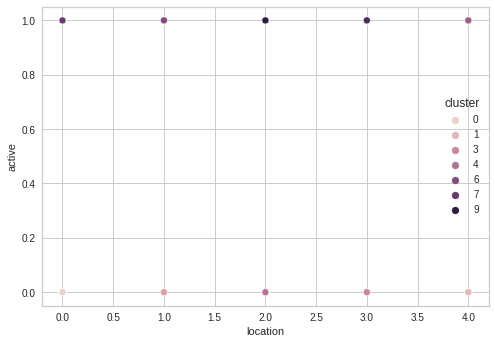

In [ ]:
# Re-look into data after clustering with k=10
scatter_plot = sns.scatterplot(x = 'location', y = 'active', data=marketing1, hue='cluster')
fig = scatter_plot.get_figure()
# fig.savefig("kmeans2.png") 

In [ ]:
marketing1['location_activation'] = marketing1['location'].astype(str) +"-"+ marketing1['active'].astype(str)
marketing1.head()

,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method,active,cluster,location_activation
6,7,7,42,0,2019-11-30,2019-12-01,2019-12-01 08:09:56 UTC,homepage,2019-12-01 08:41:56+00:00,complete,2019-12-01,1.0,266000.0,completed,Transfer Rekening,0,0,0-0
7,8,8,40,1,2019-11-30,2019-12-01,2019-12-01 08:33:51 UTC,homepage,2019-12-01 08:57:42+00:00,complete,2019-12-01,2.0,276000.0,completed,Kartu Kredit,0,2,1-0
17,3,18,23,4,2019-11-29,2019-12-02,2019-12-02 02:15:08 UTC,homepage,2019-12-02 02:47:54+00:00,complete,2019-12-02,3.0,111000.0,completed,Kartu Kredit,0,1,4-0
30,27,31,28,0,2019-12-03,2019-12-03,2019-12-03 22:09:58 UTC,homepage,2019-12-03 22:34:19+00:00,complete,2019-12-03,4.0,18500.0,completed,QRIS,0,0,0-0
33,28,34,61,1,2019-12-03,2019-12-04,2019-12-04 06:42:26 UTC,homepage,2019-12-04 07:20:44+00:00,complete,2019-12-04,5.0,259000.0,completed,Virtual Account,0,2,1-0


<ipython-input-36-289b4d459d54>:13: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans.fit(data_cluster[numeric])


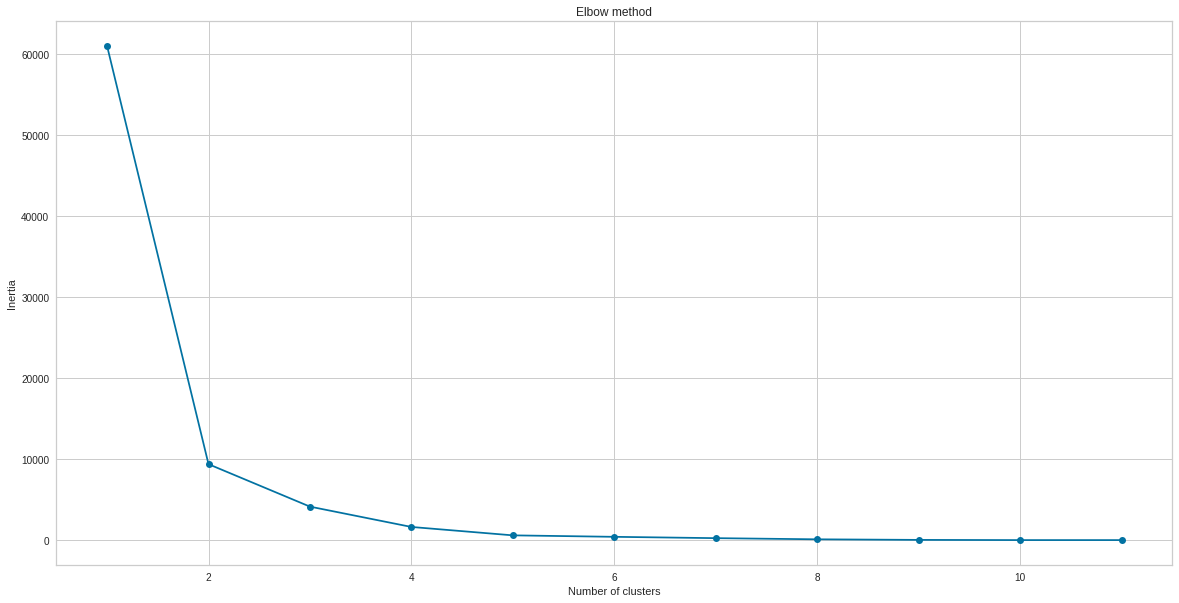

In [ ]:
# scale numeric columns
numeric = ['location','active']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster[numeric])

# compute inertia for each number of clusters
inertias = []
max_clusters = 11
k = 1

while k <= max_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_cluster[numeric])
    inertias.append(kmeans.inertia_)
    k += 1

# plot elbow graph
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(1, max_clusters+1), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


For k=2, the average silhouette score is 0.8393360639012059
For k=3, the average silhouette score is 0.7805822705996657
For k=4, the average silhouette score is 0.8454405378216154
For k=5, the average silhouette score is 0.9184733368207483
For k=6, the average silhouette score is 0.9181464906876231
For k=7, the average silhouette score is 0.9956438585460544
For k=8, the average silhouette score is 0.9969062879755392
For k=9, the average silhouette score is 0.9985661370278024
For k=10, the average silhouette score is 1.0


/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/silhouette.py:138: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  self.estimator.fit(X, y, **kwargs)


For k=11, the average silhouette score is 1.0


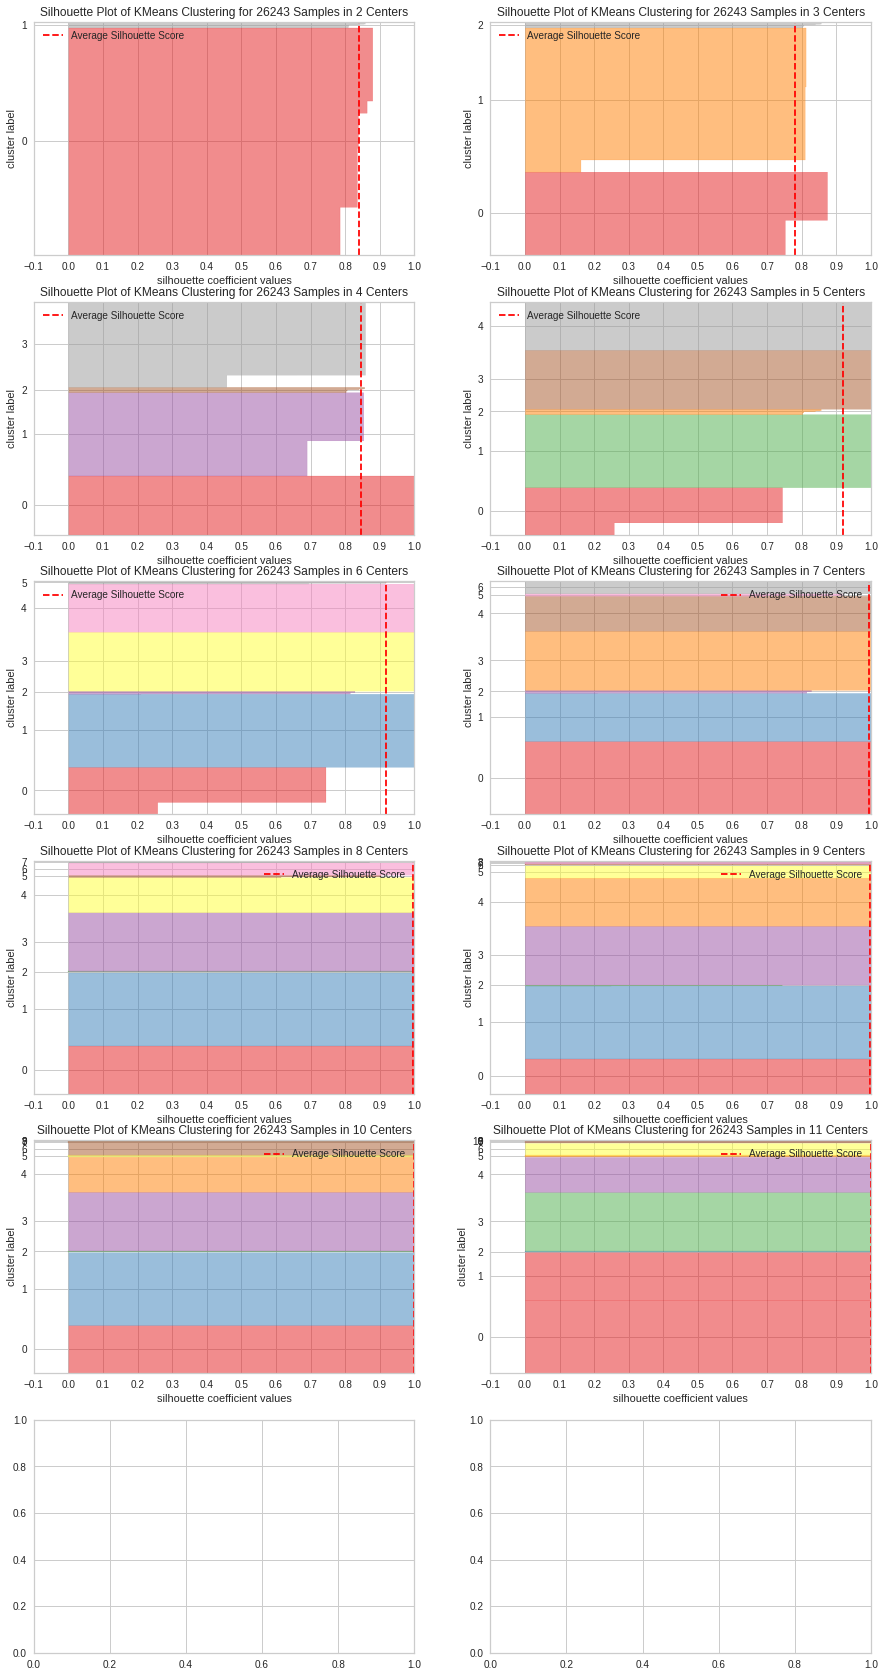

In [ ]:
n_clusters = 2
max_K = 11
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize=(15, 30))

while n_clusters <= max_K:
    kmeanModel = cluster.KMeans(n_clusters)

    q, mod = divmod(n_clusters, 2)
    sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=ax[q-1][mod])
    sil.fit(data_scaled)
    sil.finalize()
    print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

    n_clusters += 1


In [ ]:
# Group by location_activation and calculate total_amount
bylocation_balance = marketing1.groupby(['location_activation'])['total_amount'].sum().reset_index()

# Sort by total_amount in descending order
bylocation_balance = bylocation_balance.sort_values(by='total_amount', ascending=False)

# Format total_amount to decimal number and readable
bylocation_balance['total_amount'] = bylocation_balance['total_amount'].apply(lambda x: '{:,.2f}'.format(x))

# Print the result
print(bylocation_balance)

  location_activation      total_amount
2                 1-0  1,152,031,500.00
0                 0-0    830,882,000.00
6                 3-0    523,163,500.00
8                 4-0    467,753,000.00
4                 2-0    166,945,500.00
3                 1-1     19,697,500.00
1                 0-1     13,997,000.00
9                 4-1     12,459,000.00
7                 3-1      7,889,000.00
5                 2-1      2,225,500.00


In [ ]:
Total_Revenue = data_cluster['total_amount'].groupby(data_cluster['cluster']).sum().reset_index()
Total_Revenue.round(2)

,cluster,total_amount
0,0,8.308820e+08
1,1,4.677530e+08
2,2,1.152032e+09
3,3,5.231635e+08
4,4,1.669455e+08
5,5,1.245900e+07
6,6,1.969750e+07
7,7,1.399700e+07
8,8,7.889000e+06
9,9,2.225500e+06


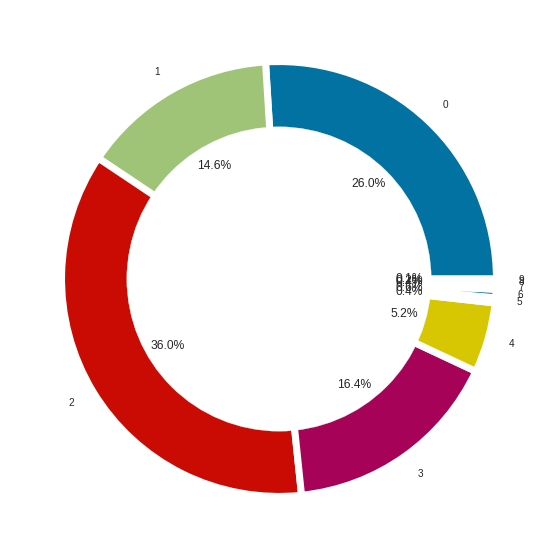

In [ ]:
#Revenue Chart
names = Total_Revenue['cluster']
size = Total_Revenue['total_amount']
plt.figure(figsize=(20, 10))
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names,
        autopct="%.1f%%",wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#RFM

In [ ]:
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sns                   #to perform visualization with many color palettes, beatifull style and many statistical plots
import plotly.express as px             # to perform visualization.

pd.set_option('display.float_format',lambda x: '%.2f'%x)

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/16VdKCjsbrC1yKZjtrKndlfGY3iTUorKjLCZX8DdjB7Y/edit#gid=708927189' 
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df.head() #only show first of 5 rows (not based on shorting etc)
df_trans = df.copy()
df_trans_before_cleaning = df.copy() # for backup
df_trans.head()


,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method
0,1,1,15,Pusat,2019-11-30,2019-12-01,2019-12-01 02:04:56 UTC,homepage,2019-12-01 02:10:45 UTC,viewcart,NaN,NaN,NaN,NaN,NaN
1,2,2,38,Timur,2019-11-29,2019-12-01,2019-12-01 02:42:49 UTC,homepage,2019-12-01 02:45:40 UTC,viewcart,NaN,NaN,NaN,NaN,NaN
2,3,3,23,Timur,2019-11-29,2019-12-01,2019-12-01 03:43:10 UTC,homepage,2019-12-01 03:48:38 UTC,chooseaddress,NaN,NaN,NaN,NaN,NaN
3,4,4,31,Selatan,2019-11-30,2019-12-01,2019-12-01 04:00:02 UTC,homepage,2019-12-01 04:00:02 UTC,homepage,NaN,NaN,NaN,NaN,NaN
4,5,5,32,Utara,2019-11-29,2019-12-01,2019-12-01 06:03:49 UTC,homepage,2019-12-01 06:11:03 UTC,chooseaddress,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check number of duplicated data
df_trans.duplicated().sum()

0

In [ ]:
import datetime
import pandas as pd

# Define current date and time
now = datetime.datetime.now()

# Convert visit_date column to datetime object
marketing1['visit_date'] = pd.to_datetime(marketing1['visit_date'])

# Filter by status=completed
marketing1 = marketing1[marketing1['status'] == 'completed']

# Creating RFM
rfm = marketing1.groupby('user_id').agg({
    'visit_date': lambda day: (now - day.max()).days,
    'user_id': lambda num: len(num),
    'total_amount': lambda total_amount: total_amount.sum()
})

col_list = ['Recency', 'Frequency', 'Money']
rfm.columns = col_list
rfm.head()


,Recency,Frequency,Money
user_id,,,
1,995,2,116000.00
2,450,2,123000.00
3,1163,2,136500.00
4,523,2,72000.00
5,975,4,222000.00


In [ ]:
df_user_segment2 = rfm.copy()


Skewness for data :  0.0

Skewness for data :  1.073875682538431

Skewness for data :  0.0


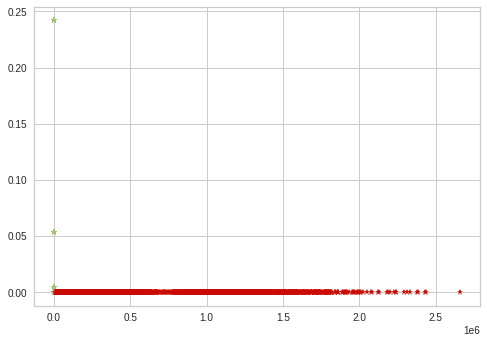

In [ ]:
## to visualize, or helping set quantile/range in RFM
from scipy.stats import skew
import numpy as np 
import pylab as p 
df_user_RFM = df_user_segment2.copy()
x1 = df_user_RFM['Recency']
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )
p.plot(x1, y1, '*')
print( '\nSkewness for data : ', skew(y1))

x1 = df_user_RFM['Frequency']
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )
p.plot(x1, y1, '*')
print( '\nSkewness for data : ', skew(y1))

x1 = df_user_RFM['Money']
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )
p.plot(x1, y1, '*')
print( '\nSkewness for data : ', skew(y1))

In [ ]:
df_user_RFM[['Recency','Frequency','Money']].describe()

,Recency,Frequency,Money
count,8693.00,8693.00,8693.00
mean,368.92,3.02,367772.17
std,239.32,1.89,421130.89
min,58.00,1.00,3500.00
25%,175.00,2.00,90500.00
50%,343.00,2.00,180000.00
75%,488.00,4.00,436000.00
max,1173.00,12.00,2660000.00


In [ ]:
#Recency, lower is better
#Set by range 0-60 =  category 5 heavy user
#Set by range 61-100 =  category 4
#Set by range 101-200 = category 3
#Set by range 201-1000 = category 2
#Set by range >1000 = category 1 no transaction in 1000 days
range = [0, 60, 100, 200,1000,20000]
df_user_RFM["R"] = pd.cut(df_user_RFM["Recency"],bins=range,labels=[5,4,3,2,1], include_lowest=True)
df_user_RFM["R"].value_counts().sort_index()
#df_user_RFM[df_user_RFM['Recency'] == 0][['Recency',"R"]]

5      51
4     782
3    1790
2    5906
1     164
Name: R, dtype: int64

In [ ]:
#Frequency, higher is better
#Set by range 0 =  category 1
#Set by range 1-3 =  category 2
#Set by range 4-10 = category 3, asumsi 1 min minggu 1x
#Set by range 11-50 = category 4, asumsi 1 min minggu 2x
#Set by range >50 = category 5 heavy user
range = [0, 1, 3, 10,50,100]
df_user_RFM["F"] = pd.cut(df_user_RFM["Frequency"],bins=range,labels=[1,2,3,4,5], include_lowest=True)
df_user_RFM["F"].value_counts().sort_index()
#df_user_RFM[df_user_RFM['Frequency'] == 0][['Frequency',"F"]]

1    2040
2    3261
3    3379
4      13
5       0
Name: F, dtype: int64

In [ ]:
#Money, higher is better
#asumsi gaji UMR 5jt
#Set by range 0 =  category 1, tidak menggunakan
#Set by range 1-100000 =  category 2, untuk orang yang coba2
#Set by range 100000-1000000 = category 3
#Set by range 1000000-50000000 = category 4
#Set by range >5jt = category 5 heavy user

range = [0, 1, 100000, 1000000,5000000,500000000]
df_user_RFM["M"] = pd.cut(df_user_RFM["Money"],bins=range,labels=[1,2,3,4,5], include_lowest=True)
df_user_RFM["M"].value_counts().sort_index()

1       0
2    2542
3    5090
4    1061
5       0
Name: M, dtype: int64

In [ ]:
df_user_RFM["RFM_Score"] = df_user_RFM["R"].astype(str) +df_user_RFM["F"].astype(str) + df_user_RFM["M"].astype(str)
df_user_RFM[['Recency','Frequency','Money','R','F','M','RFM_Score']]

,Recency,Frequency,Money,R,F,M,RFM_Score
user_id,,,,,,,
1,995,2,116000.00,2,2,3,223
2,450,2,123000.00,2,2,3,223
3,1163,2,136500.00,1,2,3,123
4,523,2,72000.00,2,2,2,222
5,975,4,222000.00,2,3,3,233
...,...,...,...,...,...,...,...
11084,71,1,64000.00,4,1,2,412
11085,71,1,33000.00,4,1,2,412
11087,71,1,33000.00,4,1,2,412


In [ ]:
## the segment mapping based on RFM Score
## moddif, some of M 4-5 give good impression
segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335, 535, 534, 443, 525, 524,434],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323,245],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311,244,253],
      "Promising":[523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[343, 334, 325, 324,254],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124,215,115,155,154],
      "Can’t Lose Them":[144, 214, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }
reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven’t spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can’t Lose Them":{
        "Segment":"Can’t Lose Them",
        "Activity":"Made biggest purchases, and often. But haven’t returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don’t lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    }

In [ ]:
df_segment = pd.DataFrame(columns=['Name','Score'])

for segment in segments.keys():
  #print(segment)
  for score in segments[segment]:
    row = pd.DataFrame(data = [[segment, score]], columns = ['Name', 'Score'])
    df_segment= pd.concat([df_segment, row])

df_segment.rename(columns={'Name':'Segment'}, inplace=True)
df_segment.rename(columns={'Score':'RFM_Score'}, inplace=True)
df_segment

,Segment,RFM_Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
0,Lost,112
0,Lost,121
0,Lost,131
0,Lost,141


In [ ]:
df_reference = pd.DataFrame(columns=['Segment','Activity','Actionable'])

for key,rows in reference.items():
  #print(key)
  for index, row in rows.items():
    #print(index)
    #print(row)
    if(index == 'Segment'):
      segment = row
    elif(index == 'Activity'):
      activity = row
    else:
      actionable = row
  
  row = pd.DataFrame(data = [[segment, activity, actionable]], columns = ['Segment','Activity','Actionable'])
  df_reference= pd.concat([df_reference, row])

df_reference

,Segment,Activity,Actionable
0,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
0,Loyal Customers,Spend good money with us often. Responsive to ...,Upsell higher value products. Ask for reviews....
0,Potential Loyalist,"Recent customers, but spent a good amount and ...","Offer membership / loyalty program, recommend ..."
0,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
0,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
0,Customers Needing Attention,"Above average recency, frequency and monetary ...","Make limited time offers, Recommend based on p..."
0,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr..."
0,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
0,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
0,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...


merge user and RFM mapping

In [ ]:
df_user_cluster = df_user_RFM.copy()

df_user_cluster.head()
df_user_cluster['RFM_Score'] = df_user_cluster['RFM_Score'].astype(str)
df_segment['RFM_Score'] = df_segment['RFM_Score'].astype(str)
df_user_cluster =  df_user_cluster.merge(df_segment, how='left', on='RFM_Score')

df_reference['Segment'] = df_reference['Segment'].astype(str)
df_reference['Activity'] = df_reference['Activity'].astype(str)
df_reference['Actionable'] = df_reference['Actionable'].astype(str)
df_user_cluster =  df_user_cluster.merge(df_reference, how='left', on='Segment')


df_user_cluster[['Segment','Activity','Actionable']]

,Segment,Activity,Actionable
0,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
1,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
2,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
3,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
4,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
...,...,...,...
8688,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
8689,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
8690,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
8691,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."


In [ ]:
rfm_action_col = ['Segment','Activity','Actionable']
df_analyze_user = df_user_cluster.copy()
df_analyze_user['Segment'].value_counts()

Hibernating                    5314
Potential Loyalist             1095
At Risk                         769
About To Sleep                  639
Recent Customers                358
Customers Needing Attention     225
Promising                       150
Loyal Customers                  96
Lost                             39
Can’t Lose Them                   8
Name: Segment, dtype: int64

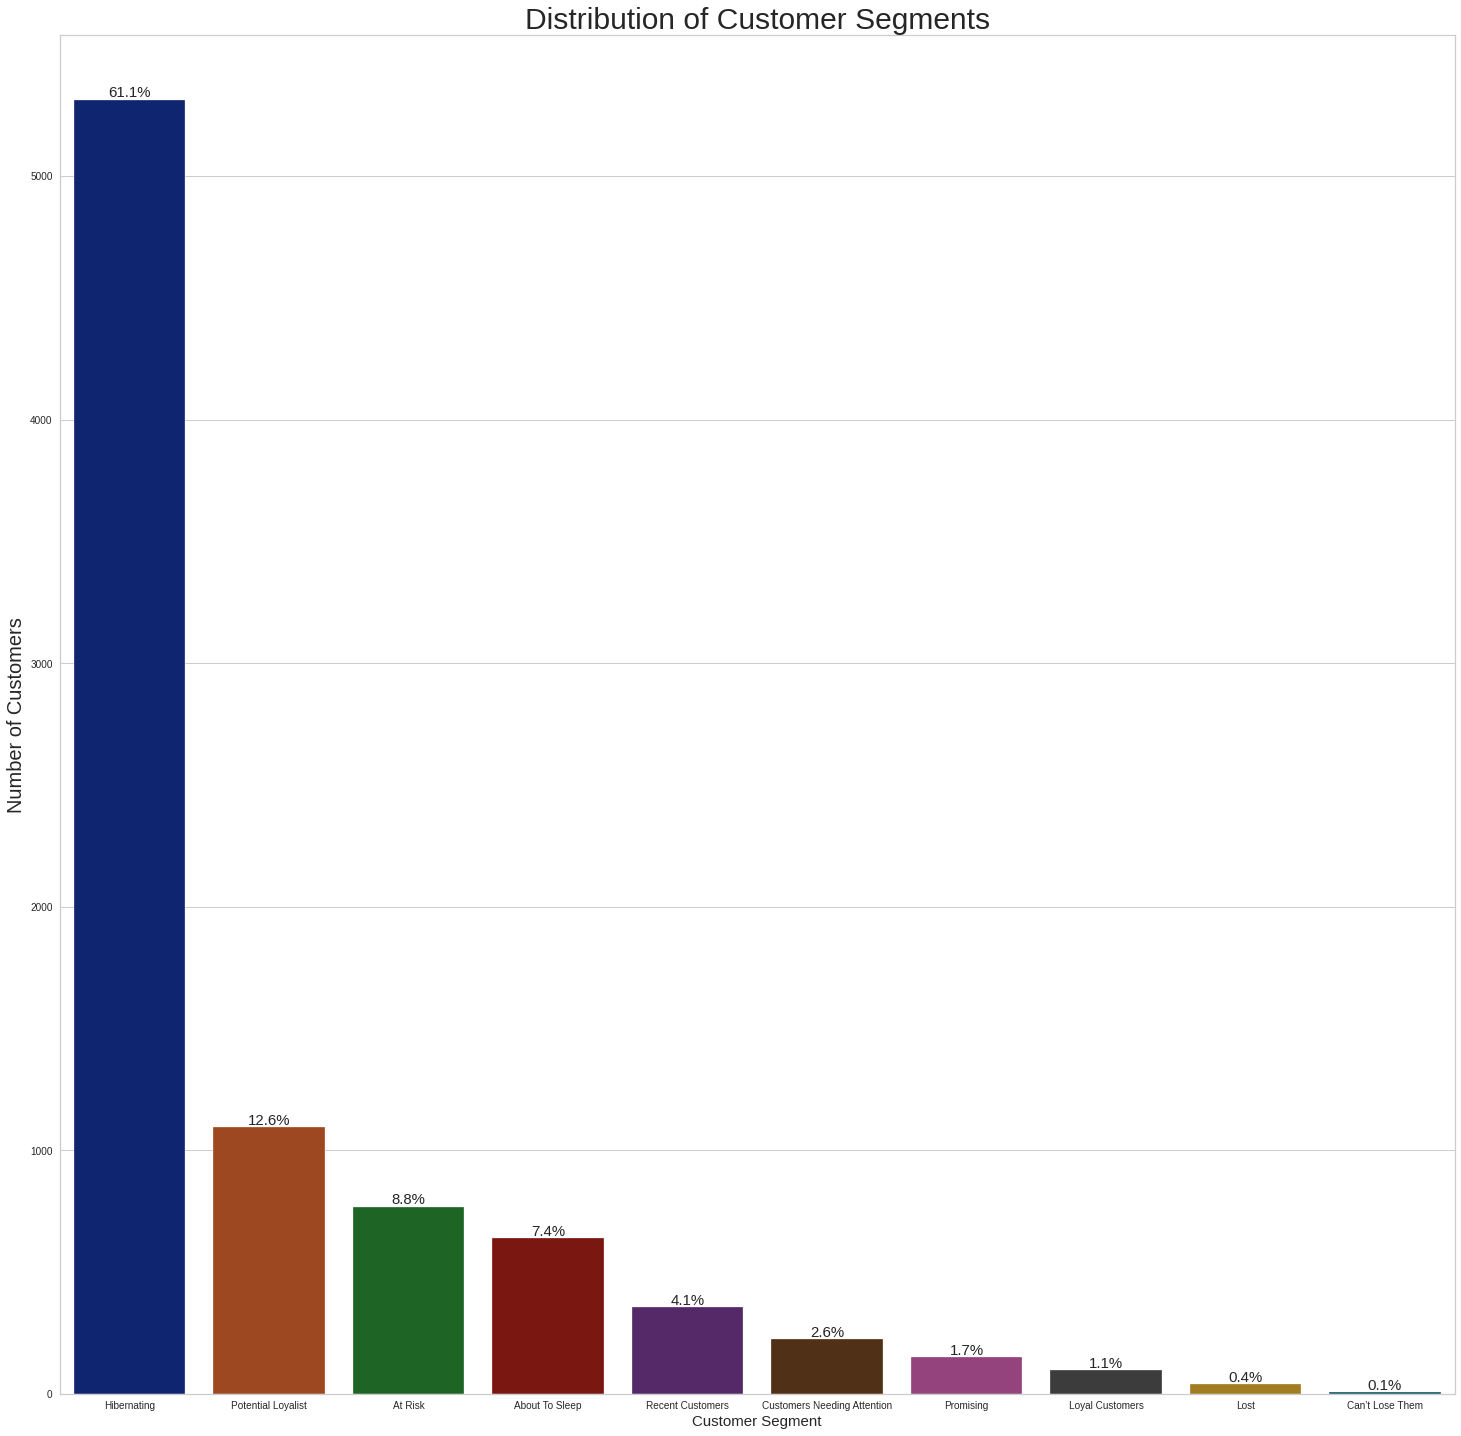

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = df_analyze_user['Segment'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
total = sum(sizes)

plt.figure(figsize=(25, 25))
sns.barplot(x=labels, y=sizes, palette='dark')
plt.title('Distribution of Customer Segments', fontsize=30)
plt.xlabel('Customer Segment', fontsize=15)
plt.ylabel('Number of Customers', fontsize=20)

for i, v in enumerate(sizes):
    plt.text(i, v+10, f'{v/total:.1%}', ha='center', fontsize=15)

plt.show()


#correlation matrix


In [ ]:
data1 = data_cluster
pd.set_option('display.max.columns',None) #to display all column, not separate)
data1.head() #only show first of 5 rows (not based on shorting etc)


,user_id,sessions_id,age,location,register_date,visit_date,first_event_time,first_event,last_event_time,last_event,trx_date,transactions_id,total_amount,status,payment_method,active,cluster,location_activation
6,7,7,42,0,2019-11-30,2019-12-01,2019-12-01 08:09:56 UTC,homepage,2019-12-01 08:41:56+00:00,complete,2019-12-01,1.00,266000.00,completed,Transfer Rekening,0,0,0-0
7,8,8,40,1,2019-11-30,2019-12-01,2019-12-01 08:33:51 UTC,homepage,2019-12-01 08:57:42+00:00,complete,2019-12-01,2.00,276000.00,completed,Kartu Kredit,0,2,1-0
17,3,18,23,4,2019-11-29,2019-12-02,2019-12-02 02:15:08 UTC,homepage,2019-12-02 02:47:54+00:00,complete,2019-12-02,3.00,111000.00,completed,Kartu Kredit,0,1,4-0
30,27,31,28,0,2019-12-03,2019-12-03,2019-12-03 22:09:58 UTC,homepage,2019-12-03 22:34:19+00:00,complete,2019-12-03,4.00,18500.00,completed,QRIS,0,0,0-0
33,28,34,61,1,2019-12-03,2019-12-04,2019-12-04 06:42:26 UTC,homepage,2019-12-04 07:20:44+00:00,complete,2019-12-04,5.00,259000.00,completed,Virtual Account,0,2,1-0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26243 entries, 6 to 192517
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   user_id              26243 non-null  int64              
 1   sessions_id          26243 non-null  int64              
 2   age                  26243 non-null  int64              
 3   location             26243 non-null  int8               
 4   register_date        26243 non-null  object             
 5   visit_date           26243 non-null  datetime64[ns]     
 6   first_event_time     26243 non-null  object             
 7   first_event          26243 non-null  object             
 8   last_event_time      26243 non-null  datetime64[ns, UTC]
 9   last_event           26243 non-null  object             
 10  trx_date             26243 non-null  object             
 11  transactions_id      26243 non-null  float64            
 12  total_amount     

In [ ]:
# Dummy variable 
data1 =pd.get_dummies(data=data1,columns=['status','payment_method'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26243 entries, 6 to 192517
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   user_id                           26243 non-null  int64              
 1   sessions_id                       26243 non-null  int64              
 2   age                               26243 non-null  int64              
 3   location                          26243 non-null  int8               
 4   register_date                     26243 non-null  object             
 5   visit_date                        26243 non-null  datetime64[ns]     
 6   first_event_time                  26243 non-null  object             
 7   first_event                       26243 non-null  object             
 8   last_event_time                   26243 non-null  datetime64[ns, UTC]
 9   last_event                        26243 non-null  object    

In [ ]:
# Ambil semua kolom yang tipenya sudah numerik
corr_column = data1.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['active','status_completed']))
corr_column

['payment_method_Transfer Rekening',
 'sessions_id',
 'payment_method_Kartu Debit',
 'payment_method_Kartu Kredit',
 'payment_method_Virtual Account',
 'user_id',
 'age',
 'cluster',
 'location',
 'total_amount',
 'payment_method_QRIS',
 'transactions_id']

<ipython-input-63-37f483b4f7cc>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1[corr_column].corr(), dtype=np.bool))


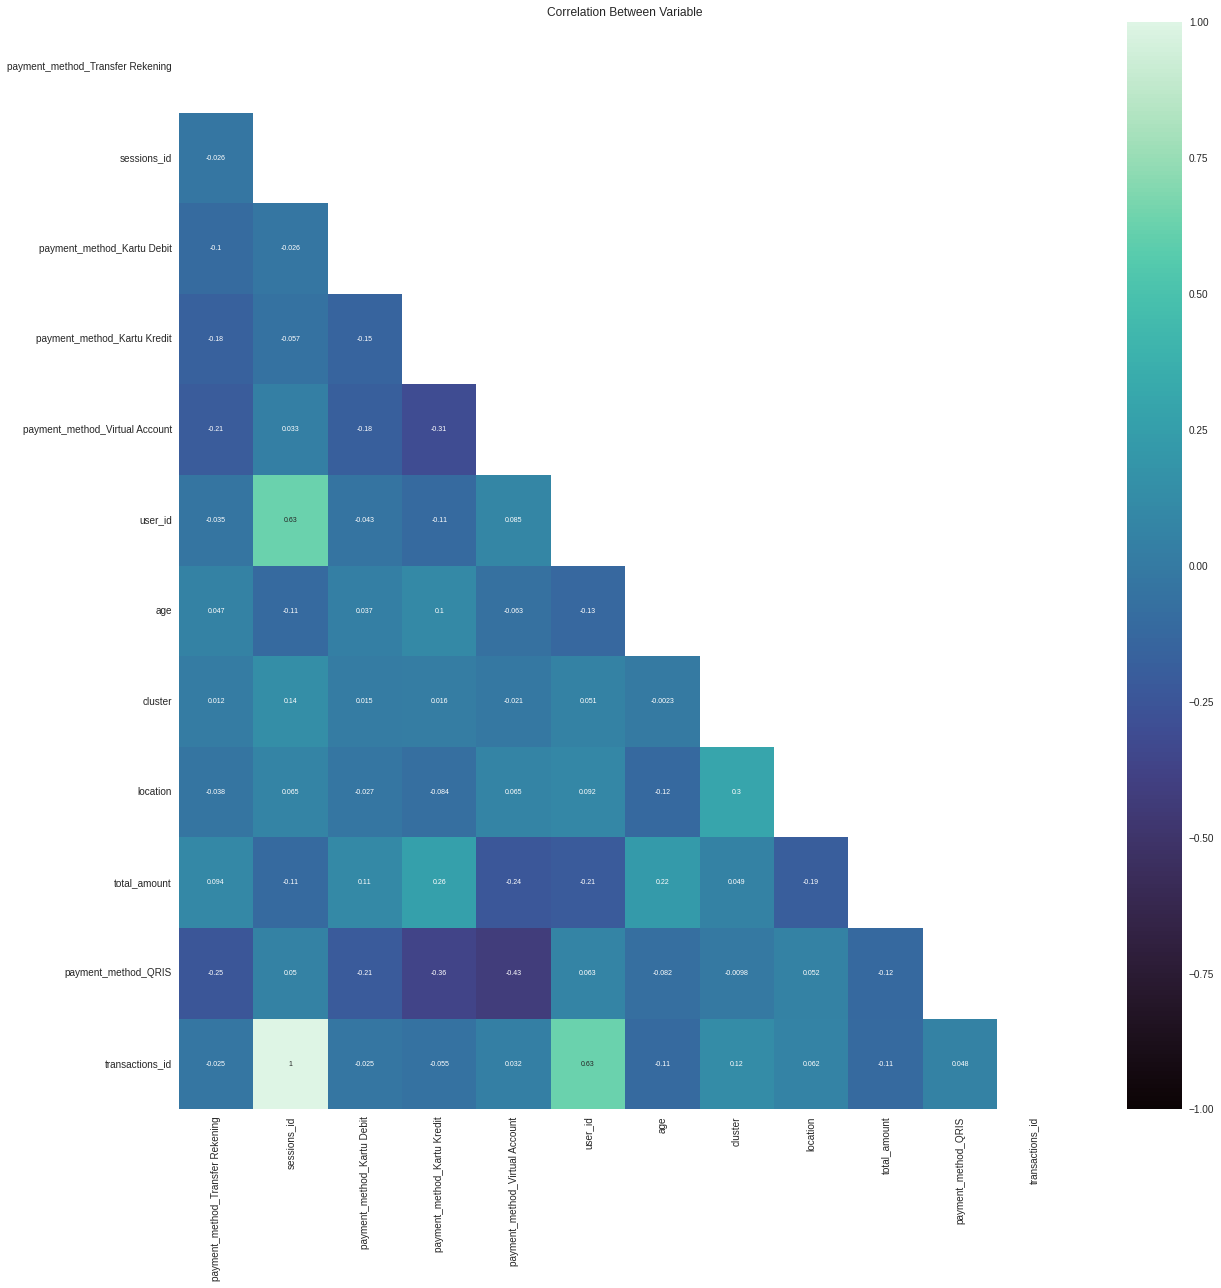

In [ ]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    data1[corr_column].corr(), dtype=np.bool))

sns.heatmap(data1[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":7})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = data1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

<ipython-input-64-8ac40a8f691e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['transactions_id']

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['payment_method_Transfer Rekening',
 'location',
 'sessions_id',
 'payment_method_Kartu Kredit',
 'user_id',
 'age',
 'cluster',
 'payment_method_Kartu Debit',
 'total_amount',
 'payment_method_QRIS',
 'payment_method_Virtual Account']

<ipython-input-67-da89192d56e8>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1[corr_column_new].corr(), dtype=np.bool))


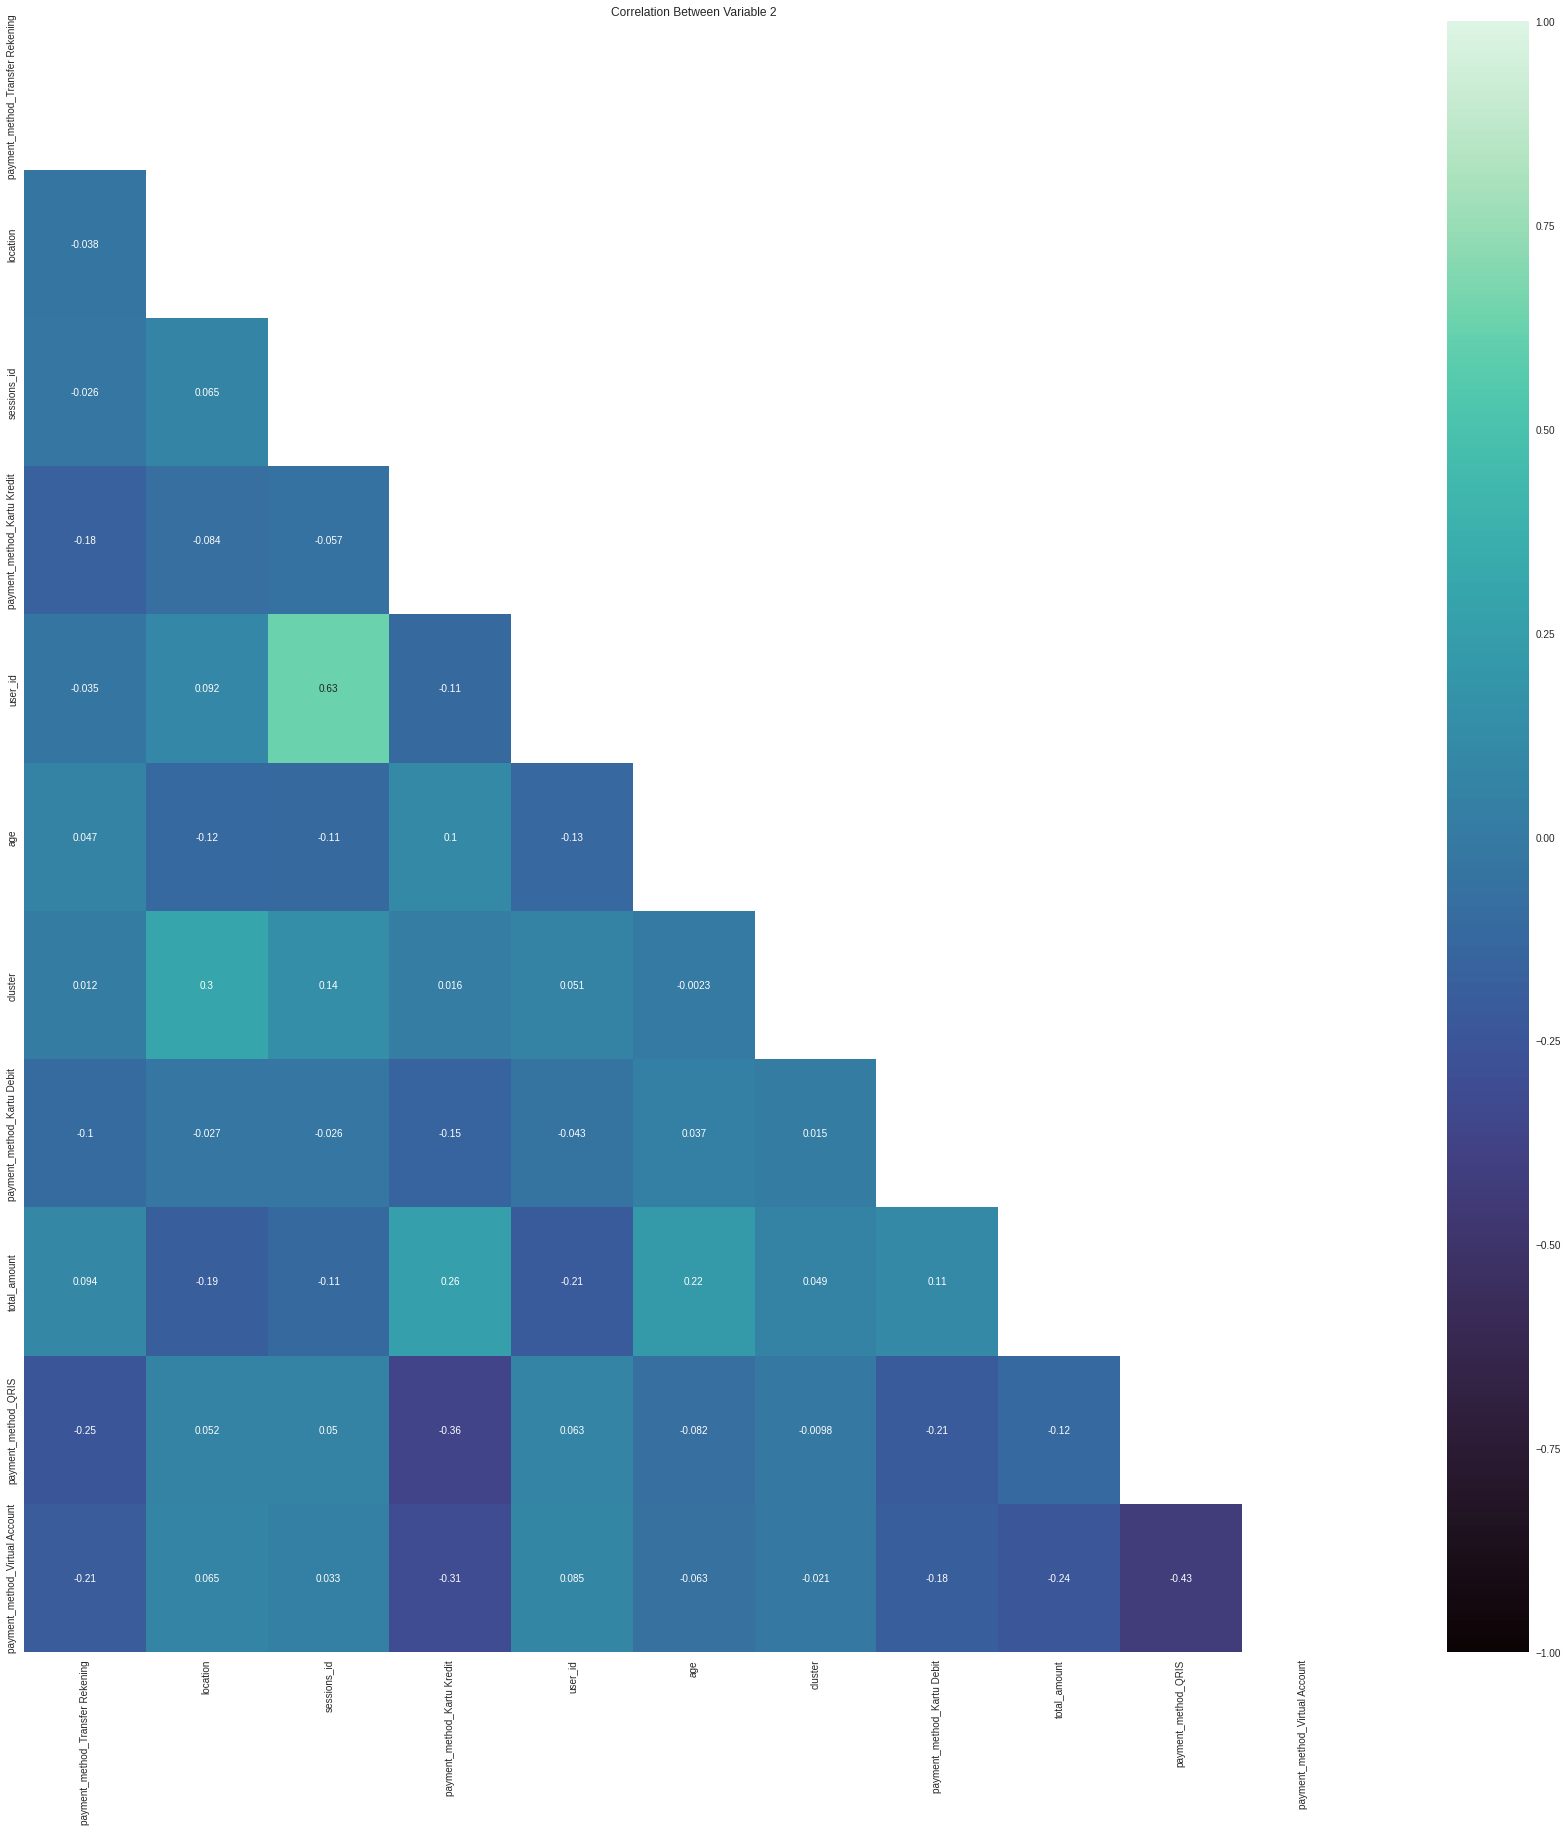

In [ ]:
corr_column_new = to_keep

fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    data1[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(data1[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

#logistic regression

In [ ]:
# Separate flag_order_bond from other variables
to_keep_vars = ['location','total_amount']
to_keep_vars

['location', 'total_amount']

In [ ]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = data_cluster[to_keep_vars]
y = data_cluster[['active']]

# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
# Check split result
for d1 in [x_training, x_test, y_training, y_test]:
  print(d1.shape)

(20994, 2)
(5249, 2)
(20994, 1)
(5249, 1)


In [ ]:
# Check class balance in each datasets
for d1 in [y_training,y_test]:
  df2 = d1.value_counts()
  print(df2)

active
0         20508
1           486
dtype: int64
active
0         5136
1          113
dtype: int64


In [ ]:
# class_weight='balanced' untuk memastikan hasil logistic regression-nya tidak condong untuk memprediksi No sebanyak-banyaknya
# max_iter=500 untuk memastikan hasil paling bagus/hasilnya "convergent". Kalau misal ketemu error convergent, naikkan max_iter-nya dr 100 (default) ke 500.
from sklearn.linear_model import LogisticRegression

# create an instance of LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=500)

# fit the model to the training data
model.fit(x_training, y_training)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
model.score(x_training, y_training)

0.9768505287224921

In [ ]:
import statsmodels.api as sm

# select the features and target variable
a = data_cluster[to_keep_vars]
b = data_cluster['active']

# add a constant column to the features
A = sm.add_constant(a)

# create a logistic regression model
data = sm.Logit(b, A)

# fit the model to the data
result = data.fit()

# print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.106907
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 active   No. Observations:                26243
Model:                          Logit   Df Residuals:                    26240
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                 0.01776
Time:                        10:32:35   Log-Likelihood:                -2805.5
converged:                       True   LL-Null:                       -2856.3
Covariance Type:            nonrobust   LLR p-value:                 9.391e-23
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.2191      0.099    -32.516      0.000      -3.413      -3.025
location         0.0535

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_training, model.predict(x_training))

array([[20508,     0],
       [  486,     0]])

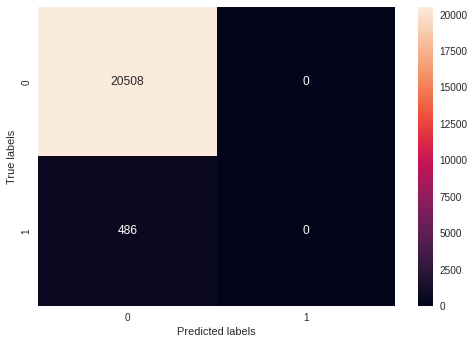

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20508
           1       0.00      0.00      0.00       486

    accuracy                           0.98     20994
   macro avg       0.49      0.50      0.49     20994
weighted avg       0.95      0.98      0.97     20994



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#check performance test

In [ ]:
model.score(x_test, y_test)

0.9784720899218898

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[5136,    0],
       [ 113,    0]])

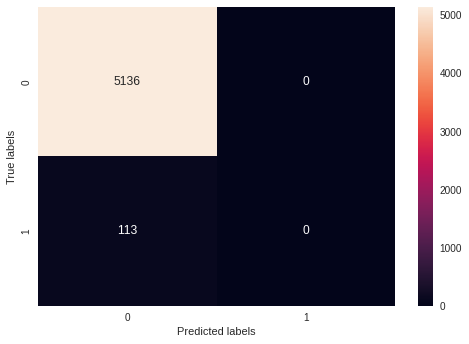

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
print(classification_report(y_test, model.predict(x_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5136
           1       0.00      0.00      0.00       113

    accuracy                           0.98      5249
   macro avg       0.49      0.50      0.49      5249
weighted avg       0.96      0.98      0.97      5249



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
